In [21]:
import os
import json
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Ellipse
import numpy as np
import pickle
import pandas as pd
import torch
import torch.nn.functional as F
import re
import optuna

In [2]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'  

import torch
torch.cuda.empty_cache()

In [3]:
from modules import (
    get_data_from_trajectory_id,
    create_simple_dataloader,
    Step_1,
    Step_2,
    CombinedHamiltonianLayer,
    SimpleStackedHamiltonianNetwork,
    ReverseStep2,
    ReverseStep1,
    ReverseCombinedHamiltonianLayer,
    InverseStackedHamiltonianNetwork,
    prediction_loss,
    prediction_loss_euclidean,
    load_checkpoint,
    count_parameters,
    hsic_loss_statistics_only,
    hsic_loss

    )

In [6]:
from modules import (    
    calculate_phi_A,
    add_phi_A_columns,
    plot_differencies,
    plot_prediction_vs_ground_truth,
    plot_euclidean_distance_over_time,
    ensemble_autoregressive_prediction,
    test_model_in_single_trajectory,
    analyze_means_with_constants,
    visualize_trajectory_movements_with_std_ellipses,
    visualize_epoch_metrics,
    analyze_folders_means,
    analyze_mapping_net,
    test_model_in_all_trajectories_in_df,
    test_model_variance_in_all_trajectories_in_df,
    plot_prediction_losses,
    plot_variance_losses,
    test_model_with_varying_observed_points,
    test_model_variance_with_varying_observed_points,
    compute_jacobian_functional,
    compute_symplectic_product,
    check_canonical_transformation,
    test_canonical_tranformation_on_trajectory,
    test_model_in_all_trajectories_with_different_single_observation_in_df,
    )

In [7]:
save_dir_path = "./save_directory_8" 


In [8]:
with open("all_dataframes.pkl", "rb") as f:
    loaded_dfs = pickle.load(f)

# Access them like before:
train_df = loaded_dfs['train_df']
val_df = loaded_dfs['val_df']
test_df = loaded_dfs['test_df']

train_id_df = loaded_dfs['train_id_df']
val_id_df = loaded_dfs['val_id_df']
test_id_df = loaded_dfs['test_id_df']

with open("df_high_energy_revised.pkl", "rb") as f:
    df_high_energy_revised = pickle.load(f)

val_df_high_energy_revised = df_high_energy_revised['val_df_high_energy_revised']
val_id_df_high_energy_revised = df_high_energy_revised['val_id_df_high_energy_revised']

test_df_high_energy_revised = df_high_energy_revised['test_df_high_energy_revised']
test_id_df_high_energy_revised = df_high_energy_revised['test_id_df_high_energy_revised']

In [9]:
train_id_df_added = add_phi_A_columns(train_id_df)
val_id_df_added = add_phi_A_columns(val_id_df)
val_id_df_high_energy_revised_added = add_phi_A_columns(val_id_df_high_energy_revised)

⚠️ Skipping epoch_1009 (no epoch_metrics.json found)

📊 Metric summaries:
  Lowest loss of metric 'val_prediction_loss_' recorded in epoch 997 with the value: 2.5388, the losses of the last 5 epochs are: ['2.6607', '2.6883', '2.6297', '2.6099', '2.6065']
  Lowest loss of metric 'val_variance_loss_high_energy' recorded in epoch 982 with the value: 54.2276, the losses of the last 5 epochs are: ['84.1845', '80.6370', '67.4653', '68.7007', '78.9664']
  Lowest loss of metric 'val_prediction_loss_high_energy' recorded in epoch 987 with the value: 4.5228, the losses of the last 5 epochs are: ['4.6677', '4.6312', '5.1290', '4.8894', '4.7495']
  Lowest loss of metric 'val_variance_loss_training_set' recorded in epoch 997 with the value: 22.7816, the losses of the last 5 epochs are: ['23.5602', '23.5964', '23.2273', '23.4379', '23.3002']
  Lowest loss of metric 'val_prediction_loss_training_set' recorded in epoch 1003 with the value: 2.7425, the losses of the last 5 epochs are: ['2.7981', '2.787

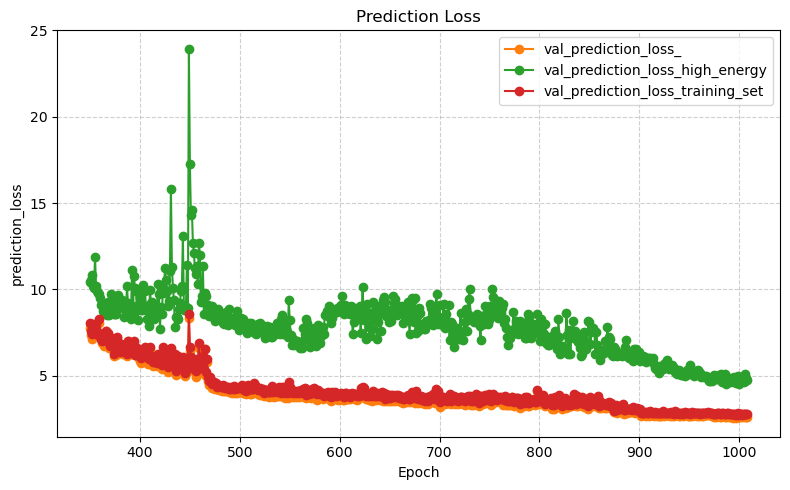

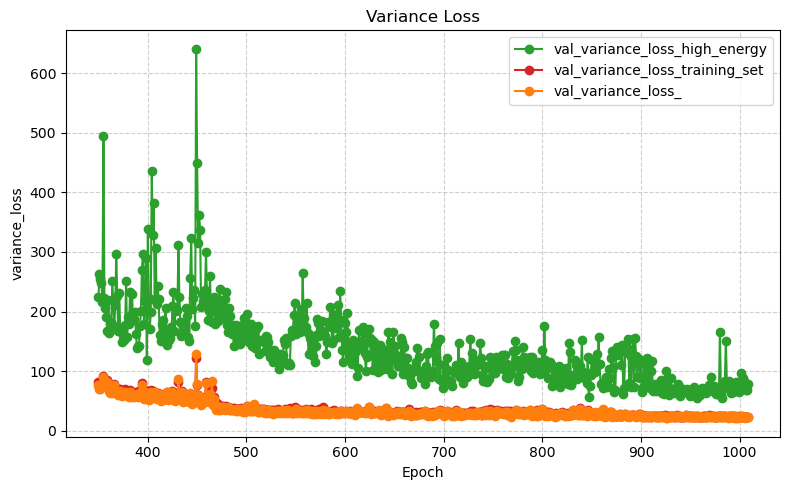

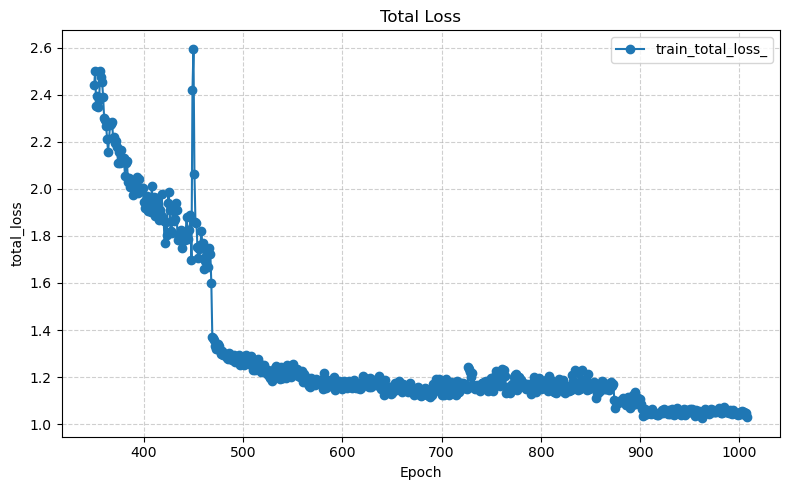

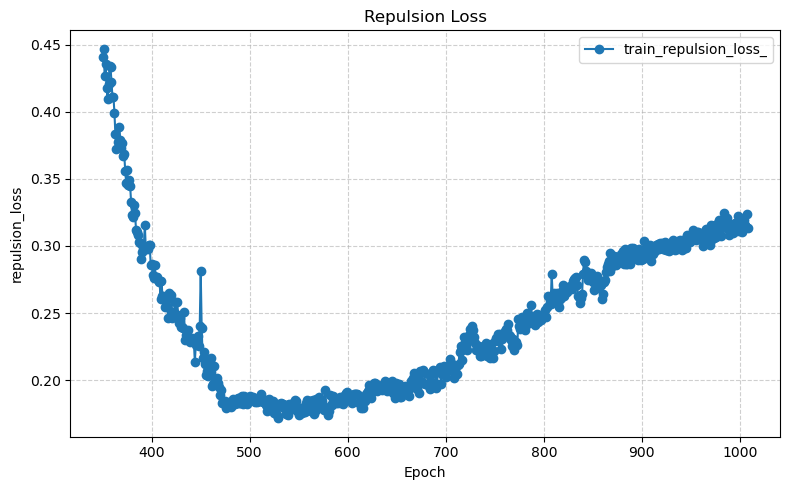

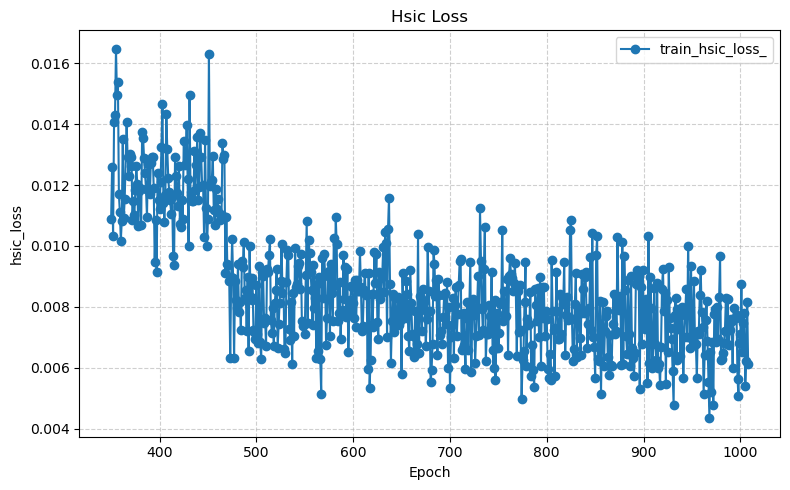

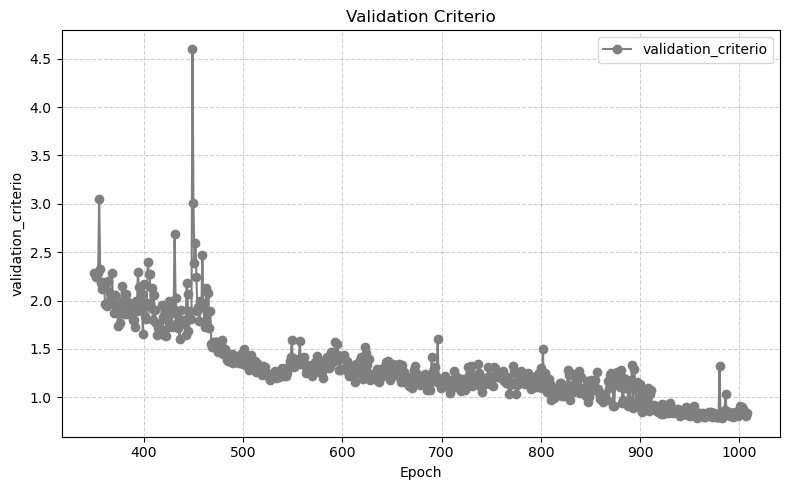

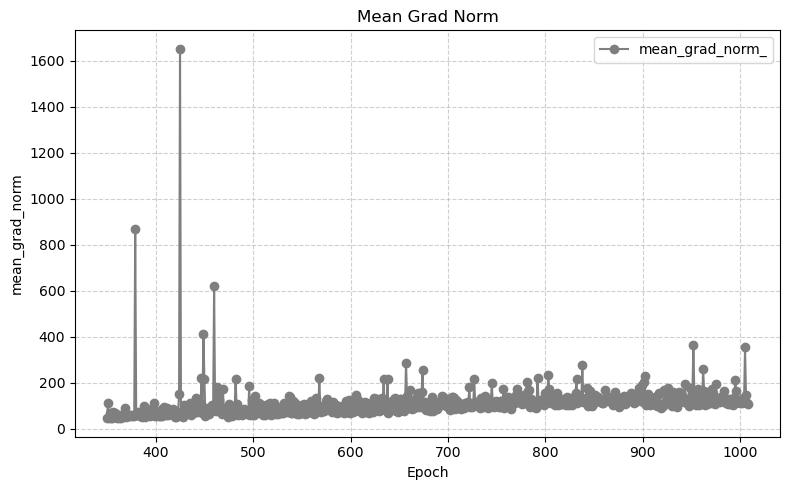

In [114]:
visualize_epoch_metrics(
 save_dir_path,
["val_prediction_loss_", "val_variance_loss_high_energy", "val_prediction_loss_high_energy", "val_variance_loss_training_set", "val_prediction_loss_training_set",  "val_variance_loss_", "train_total_loss_", "train_repulsion_loss_", "train_hsic_loss_" , "validation_criterio", "mean_grad_norm_"],
plot_on_same_graph=True,
verbose=True,
specific_epochs=[350, "last"]
)


📊 Processing directory: val_trajectories_data

For the epoch_1010 in val_trajectories_data the values are:
92: X_mean = 7.1971 ± 4.4907, U_mean = -13.3071 ± 5.9120 and A=13.564677634903196, phi=-2.7802771843251053
64: X_mean = 5.3452 ± 3.8776, U_mean = -11.7189 ± 4.7852 and A=11.313750136394223, phi=-2.8600808883112765
6: X_mean = 3.8831 ± 4.2286, U_mean = -4.4322 ± 2.1540 and A=3.4643759649388923, phi=0.5272390069263062

📊 Processing directory: val_train_set_trajectories_data

For the epoch_1010 in val_train_set_trajectories_data the values are:
2: X_mean = -2.0481 ± 2.6819, U_mean = -7.7249 ± 1.0172 and A=2.0004916751010886, phi=-1.322539930867642
120: X_mean = -2.0419 ± 7.1981, U_mean = 0.1906 ± 6.1657 and A=15.491933918298438, phi=-0.3577443145058989
96: X_mean = 1.7558 ± 5.2349, U_mean = 0.4176 ± 5.5807 and A=13.856421371448707, phi=0.050548714589954684

📊 Processing directory: val_high_energy_trajectories_data

For the epoch_1010 in val_high_energy_trajectories_data the values a

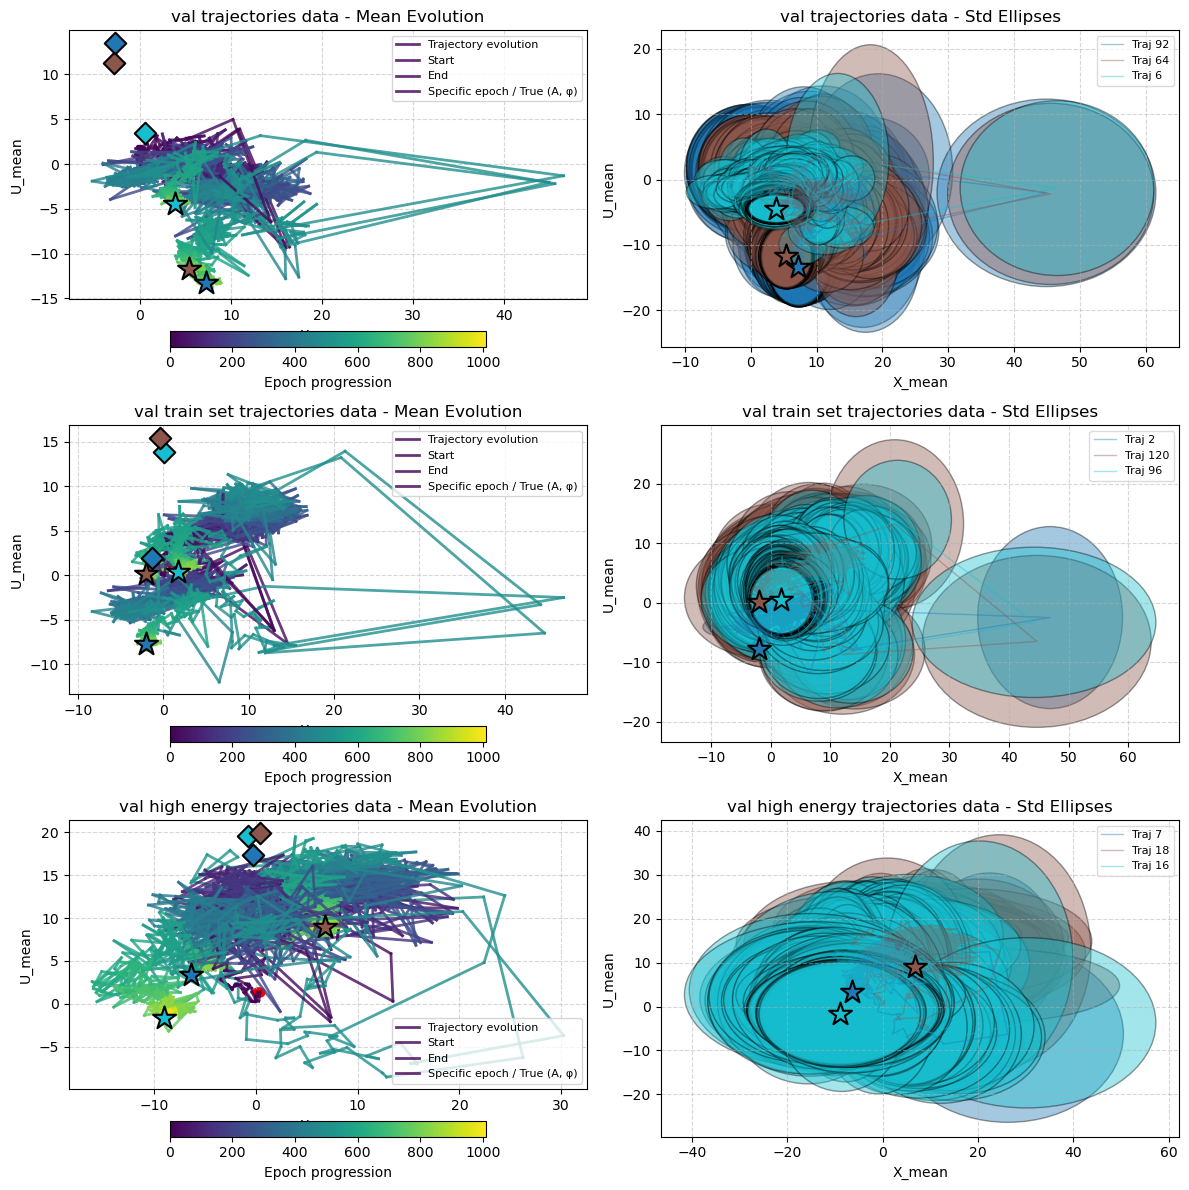


✅ Mean + Std (ellipse) visualization complete.


In [9]:
visualize_trajectory_movements_with_std_ellipses(save_dir_path, number_of_points_to_plot=3, right_plot_alpha=0.4, verbose=True, specific_epoch = "last", visualize_true_constants=True,train_id_df_added=train_id_df_added,val_id_df_added=val_id_df_added,val_id_df_high_energy_added=val_id_df_high_energy_revised_added)

In [47]:
val_differencies_df, val_train_differencies_set_df, val_high_energy_differencies_df = analyze_means_with_constants(
    save_dir_path=save_dir_path,
    specific_epoch="last",
    train_id_df_added=train_id_df_added,
    val_id_df_added=val_id_df_added,
    val_id_df_high_energy_added=val_id_df_high_energy_revised_added
)

📂 Using data from epoch: epoch_877
✅ Data extraction complete.


In [48]:
hsic_loss_statistics_only(
    x=torch.Tensor(val_train_differencies_set_df['A']),
    y=torch.Tensor(val_train_differencies_set_df['phi']),
    sigma_x = -1,
    sigma_y = -1,
    use_unbiased = True,
    epsilon = 1e-10)

tensor(0.)

In [49]:
hsic_loss_statistics_only(
    x=torch.Tensor(val_train_differencies_set_df['X_mean']),
    y=torch.Tensor(val_train_differencies_set_df['U_mean']),
    sigma_x = -1,
    sigma_y = -1,
    use_unbiased = True,
    epsilon = 1e-10)

tensor(0.)

0.0657

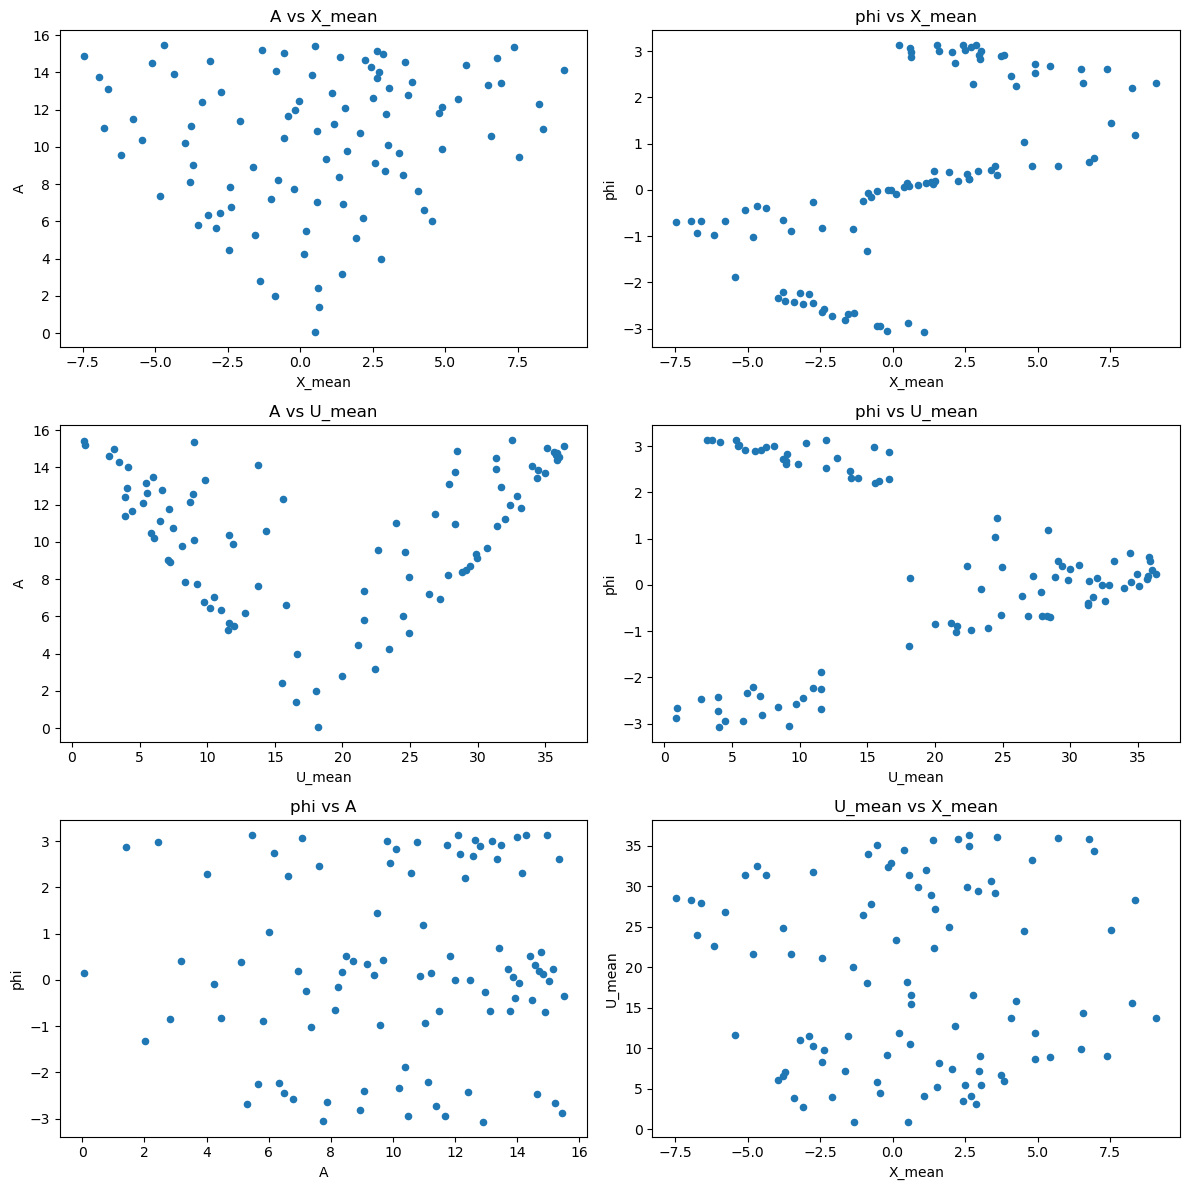

In [50]:
plot_differencies(val_train_differencies_set_df)

📊 Analyzing 1011 epochs across 3 directories...

📁 Processing directory: val_trajectories_data

📁 Processing directory: val_train_set_trajectories_data

📁 Processing directory: val_high_energy_trajectories_data


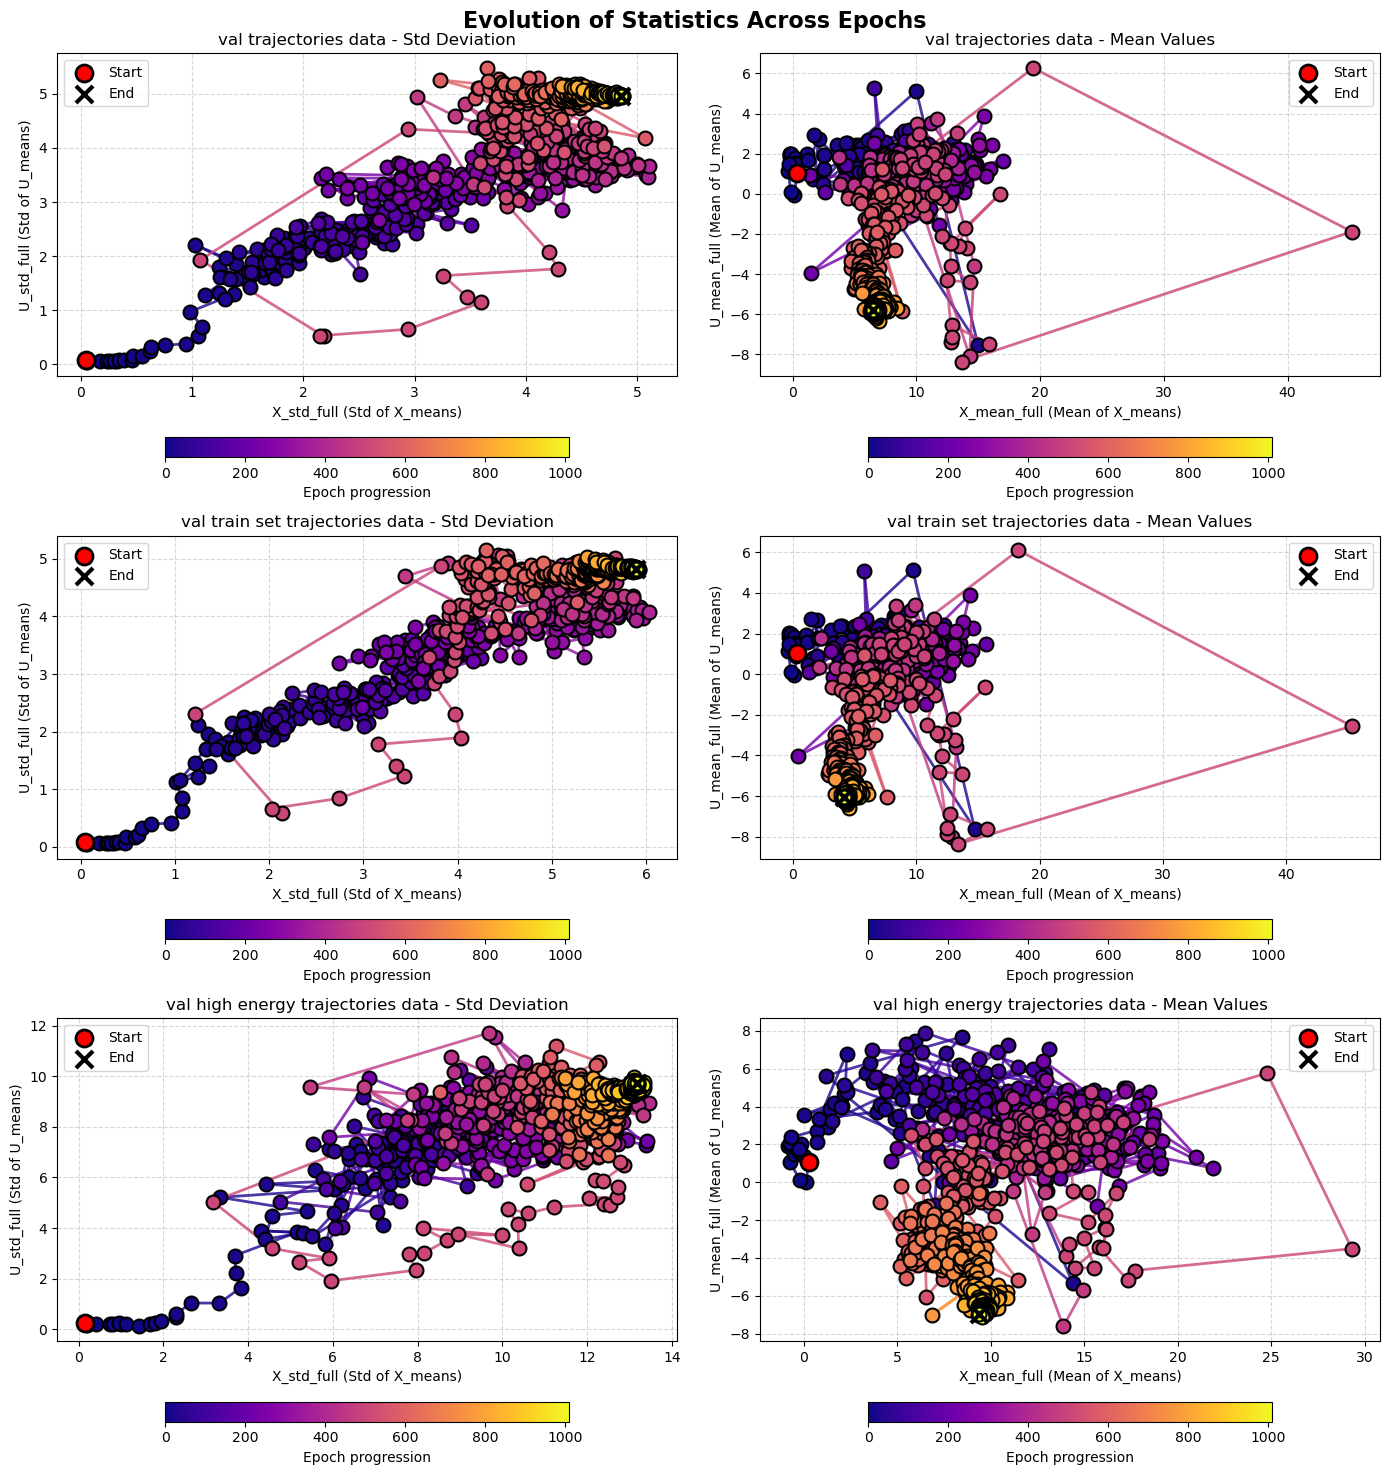

In [14]:
analyze_folders_means(save_dir_path, locate_epoch=None)

In [10]:
device = "cuda"
mapping_net = SimpleStackedHamiltonianNetwork(
        #Hpw many Step_1 + Step_2 layers to stack
    n_layers=10,
        # MLP Architecture parameters
    hidden_dims= [10, 20, 10],
    n_hidden_layers = None,   #Leave None if you provide list on hidden_dims
        
        # Activation parameters
    activation = 'gelu',
    activation_params = None,
    final_activation = None,   #Final layer activation function
    final_activation_only_on_final_layer = True,
    tanh_wrapper = False,
        
        # Initialization parameters
    weight_init = 'orthogonal',
    weight_init_params = {'gain': 1},
    bias_init = 'zeros',
    bias_init_value = 0.0,
        
        
        # Architectural choices
    use_bias = True,
    use_layer_norm = False,
    
    # Input/Output parameters
    input_dim = 2,  # x or u and t
    output_dim = 1,  # scalar G or F
    a_eps_min= 0.5,  # Minimum value for a
    a_eps_max= 2,  # Maximum value for a  
    a_k= 0.1,

    step_1_a_mean_innit= 1.2,
    step_2_a_mean_innit= 1.2,
    std_to_mean_ratio_a_mean_init= 0.0,

    step_1_gamma_mean_innit= 0.5,
    step_2_gamma_mean_innit= 0.5,
    std_to_mean_ratio_gamma_mean_init= 0.0,

    step_1_c1_mean_innit= 0.0,
    step_2_c1_mean_innit= 0.0,
    std_to_mean_ratio_c1_mean_init= 1.0,

    step_1_c2_mean_innit= 0.0,
    step_2_c2_mean_innit= 0.0,
    std_to_mean_ratio_c2_mean_init= 1.0,

    bound_innit=0.0,
).to(device)

checkpoint_path = os.path.join(save_dir_path, "best_model.pt")

load_checkpoint(path=checkpoint_path, mapping_net=mapping_net, device=device, optimizer=None, scheduler=None)

inverse_net = InverseStackedHamiltonianNetwork(forward_network=mapping_net)


Successfully loaded model
Created inverse network with 10 reverse layers


/home/thomasdev/Desktop/Hamilton_Jacobi_NN/Hamilton_Jacobi_NN/modules.py:4200: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location=devic

In [225]:
test_canonical_tranformation_on_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, compute_jacobian_functional_function=compute_jacobian_functional, compute_symplectic_product_function=compute_symplectic_product, check_canonical_transformation_function=check_canonical_transformation, tolerance=1e-4, test_id_df=val_id_df, test_df=val_df, trajectory_id=50, mapping_net=mapping_net, inverse_net=inverse_net, device=device)

For the mapping network:
✓ All 242 transformations are canonical (preserve symplectic structure)!
  Maximum error across all samples: 2.10e-05
For the inverse network:
✓ All 242 transformations are canonical (preserve symplectic structure)!
  Maximum error across all samples: 4.77e-06


In [16]:
print(f"Number of parameters are: {count_parameters(mapping_net)}, with number of training samples: {train_df.shape[0]}\nThat is a ratio of parameters/samples of: {count_parameters(mapping_net)/train_df.shape[0]}")

Number of parameters are: 9500, with number of training samples: 23232
That is a ratio of parameters/samples of: 0.4089187327823691


   num_observed_points  mean_loss
0                    1   5.257938
1                    2   4.920263
2                    3   4.751551
3                    4   4.684066
4                    5   4.926793
5                    6   4.810528
6                    7   5.498297
7                    8   5.254750
8                    9   5.087208
9                   10   4.969807


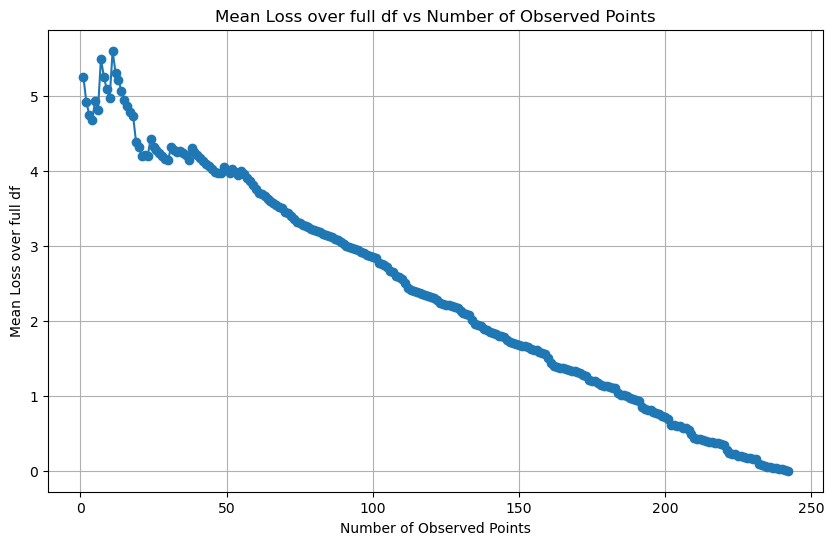

In [227]:
val_loss_per_points_df = test_model_with_varying_observed_points(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df, test_df=val_df, mapping_net=mapping_net, inverse_net=inverse_net, device=device)

   num_observed_points  mean_variance
0                    1       0.000000
1                    2       1.371074
2                    3       2.846893
3                    4       3.936029
4                    5       3.225626
5                    6      26.202967
6                    7      25.385415
7                    8      22.216640
8                    9      19.912711
9                   10      18.027685


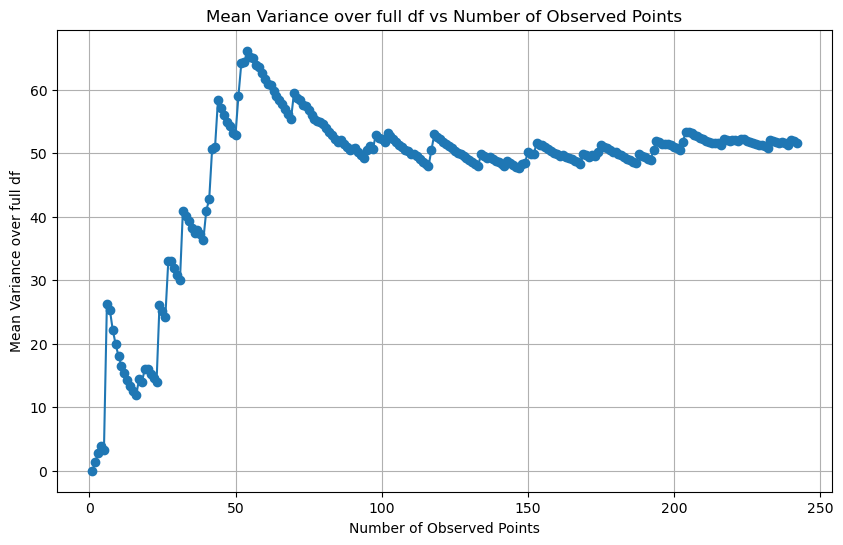

In [228]:
val_variance_per_points_df = test_model_variance_with_varying_observed_points(get_data_from_trajectory_id_function=get_data_from_trajectory_id ,test_id_df=val_id_df, test_df=val_df, mapping_net=mapping_net ,device=device)

In [12]:
point_indexes_observed = [0]

In [13]:
k=1
mass=1
constant = -(k / mass)
omega = np.sqrt(-constant)
period = 2*np.pi/omega
print(f"Period is constant and = {period:.3f}")

tmax_list = []
for idx, row in train_id_df.iterrows():
    trajectory_id = int(row['trajectory_id'])
    start_index = int(row['start_index'])
    end_index = int(row['end_index'])
    
    test_trajectory_data = get_data_from_trajectory_id(train_id_df, train_df, trajectory_ids=trajectory_id)
    t = test_trajectory_data['t'].to_numpy(dtype=np.float32)
    tmax = max(t)
    tmax_list.append(tmax)
max_t_training = min(np.array(tmax_list))
    

Period is constant and = 6.283


In [23]:


# ---------------------------------------------------------
# 1. PREPARE FIXED ARGUMENTS
# ---------------------------------------------------------
# These arguments never change during the optimization.
# We pack them here to keep the objective function clean.
fixed_args = {
    "get_data_from_trajectory_id_function": get_data_from_trajectory_id,
    "prediction_loss_function": prediction_loss_euclidean,
    "test_id_df": val_id_df,
    "test_df": val_df,
    "mapping_net": mapping_net,
    "inverse_net": inverse_net,
    "device": device,
    "point_indexes_observed": point_indexes_observed,
    "recreate_and_plot_phase_space": False,
    "plot_specific_portion": 0.26,
    "connect_points": False,
    "plot_trajectories_subsample": 0.4,
    "max_t_training": max_t_training,
    "search_range_lower_pct": 0.1,  # Assuming this is fixed
    "verbose":False
}

# ---------------------------------------------------------
# 2. DEFINE THE OBJECTIVE FUNCTION
# ---------------------------------------------------------
def objective(trial):
    """
    This function runs ONE experiment. 
    Optuna provides the 'trial' object which we use to select params.
    """
    
    # A. Suggest the Boolean switch first
    efficiently_param = trial.suggest_categorical("efficiently", [True, False])
    
    # B. Conditional Logic (The Bayesian part)
    # Optuna's sampler will learn that 'threshold' is only relevant when efficiently=False
    if efficiently_param:
        # If efficient, passed params don't matter, but we must pass something to avoid errors
        threshold_param = 1.0 
        upper_pct_param = 0.6 
    else:
        # If NOT efficient, Optuna suggests values within your specified ranges
        # suggest_float(name, low, high)
        threshold_param = trial.suggest_float("threshold", 0.1, 3.0) 
        upper_pct_param = trial.suggest_float("search_range_upper_pct", 0.2, 0.9)

    # C. Run your actual function
    # We handle exceptions so one bad run doesn't crash the whole study
    try:
        _, mean_loss = test_model_in_all_trajectories_in_df(
            efficiently=efficiently_param,
            threshold=threshold_param,
            search_range_upper_pct=upper_pct_param,
            **fixed_args
        )
    except Exception as e:
        print(f"Trial failed: {e}")
        # Return infinity so Optuna knows this was a terrible run
        return float('inf')

    # D. Return the value we want to MINIMIZE
    return mean_loss

# ---------------------------------------------------------
# 3. RUN THE OPTIMIZATION (THE STUDY)
# ---------------------------------------------------------
print("Starting Bayesian Optimization...")

# Create the study. We want to 'minimize' the loss.
study = optuna.create_study(direction="minimize")

# n_trials=20 means it will run your function 20 times. 
# Increase this to 50 or 100 if you have time.
study.optimize(objective, n_trials=30)

# ---------------------------------------------------------
# 4. VIEW RESULTS
# ---------------------------------------------------------
print("-" * 30)
print("BEST RESULTS FOUND:")
print(f"Best Mean Loss: {study.best_value}")
print("Best Hyperparameters:", study.best_params)

# If you want to see all trials as a DataFrame:
df_results = study.trials_dataframe()
# print(df_results)

[I 2025-11-20 16:28:22,440] A new study created in memory with name: no-name-2c19fc43-1297-4f9e-b7c7-75e9b5589755


Starting Bayesian Optimization...


[I 2025-11-20 16:28:22,982] Trial 0 finished with value: 2.2277495165665946 and parameters: {'efficiently': True}. Best is trial 0 with value: 2.2277495165665946.
[I 2025-11-20 16:31:26,070] Trial 1 finished with value: 2.3555385073026023 and parameters: {'efficiently': False, 'threshold': 2.50921854426129, 'search_range_upper_pct': 0.6966942513554294}. Best is trial 0 with value: 2.2277495165665946.
[I 2025-11-20 16:31:26,564] Trial 2 finished with value: 2.2277495165665946 and parameters: {'efficiently': True}. Best is trial 0 with value: 2.2277495165665946.
[I 2025-11-20 16:34:13,487] Trial 3 finished with value: 1.8995528817176819 and parameters: {'efficiently': False, 'threshold': 2.6355110890532902, 'search_range_upper_pct': 0.29458530030821356}. Best is trial 3 with value: 1.8995528817176819.
[I 2025-11-20 16:34:13,954] Trial 4 finished with value: 2.2277495165665946 and parameters: {'efficiently': True}. Best is trial 3 with value: 1.8995528817176819.
[I 2025-11-20 16:34:14,409

------------------------------
BEST RESULTS FOUND:
Best Mean Loss: 1.1388339598973591
Best Hyperparameters: {'efficiently': False, 'threshold': 0.8947378594655051, 'search_range_upper_pct': 0.5031434228967245}


     trajectory_id      energy  prediction_loss  loss_per_sqrt_energy
6                6    6.000950         2.200216              0.898163
11              11   11.000909         1.823869              0.549895
28              28   28.000769         2.075254              0.392181
43              43   43.000645         2.675726              0.408041
50              50   50.000587         1.701301              0.240599
64              64   64.000471         1.585154              0.198143
71              71   71.000413         1.791509              0.212612
85              85   85.000298         2.395466              0.259824
92              92   92.000240         2.529845              0.263754
93              93   93.000231         2.277350              0.236150
103            103  103.000149         2.356879              0.232230
114            114  114.000058         3.320424              0.310986
Mean prediction loss over full dataframe: 2.2277


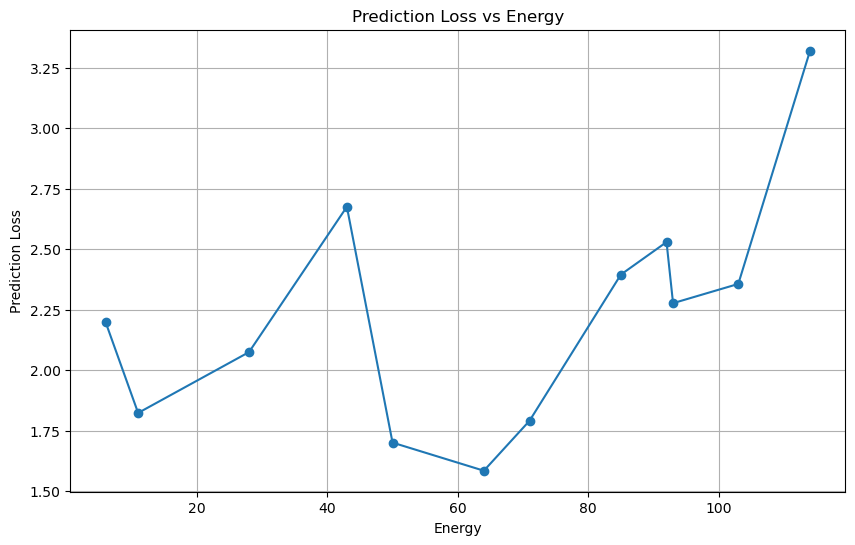

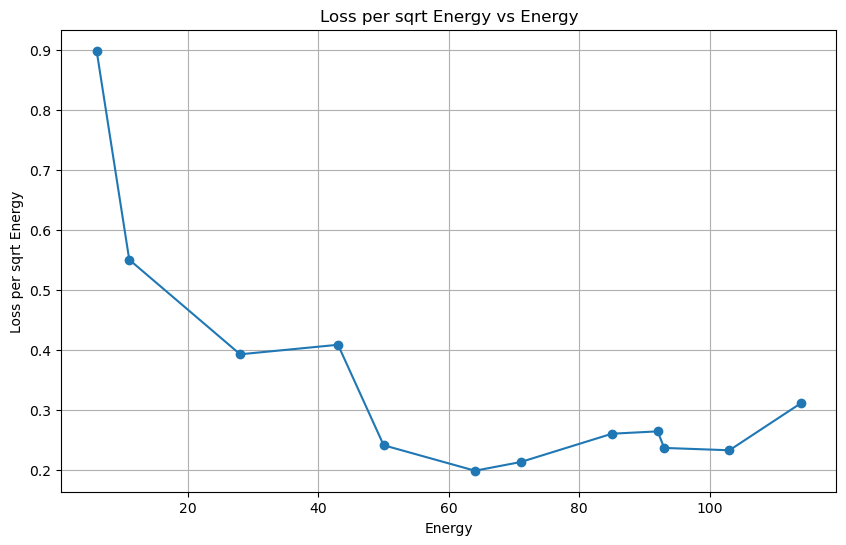

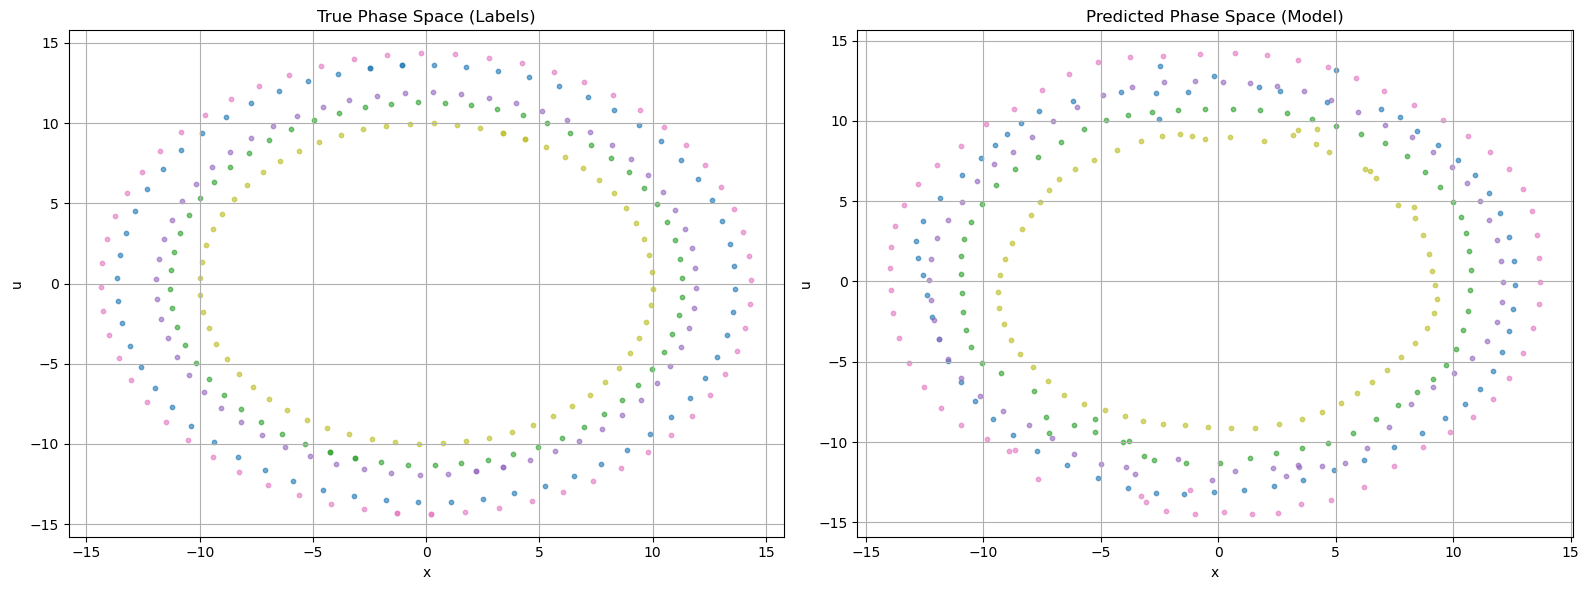

In [ ]:
prediction_val_df, mean_prediction_loss_val, _ = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df, test_df=val_df, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, recreate_and_plot_phase_space=True, plot_specific_portion=0.26, connect_points=False, plot_trajectories_subsample=0.4, max_t_training=max_t_training, efficiently=True, threshold=1.0, search_range_lower_pct=0.5, search_range_upper_pct=0.6, verbose=True)

     trajectory_id      energy  prediction_loss  loss_per_sqrt_energy
6                6    6.000950         0.282548              0.115340
11              11   11.000909         0.312953              0.094355
28              28   28.000769         0.392226              0.074123
43              43   43.000645         0.560456              0.085468
50              50   50.000587         0.380978              0.053878
64              64   64.000471         0.980706              0.122588
71              71   71.000413         0.889415              0.105554
85              85   85.000298         1.106239              0.119988
92              92   92.000240         1.655119              0.172558
93              93   93.000231         1.753949              0.181876
103            103  103.000149         2.175004              0.214309
114            114  114.000058         3.176415              0.297498
Mean prediction loss over full dataframe: 1.1388


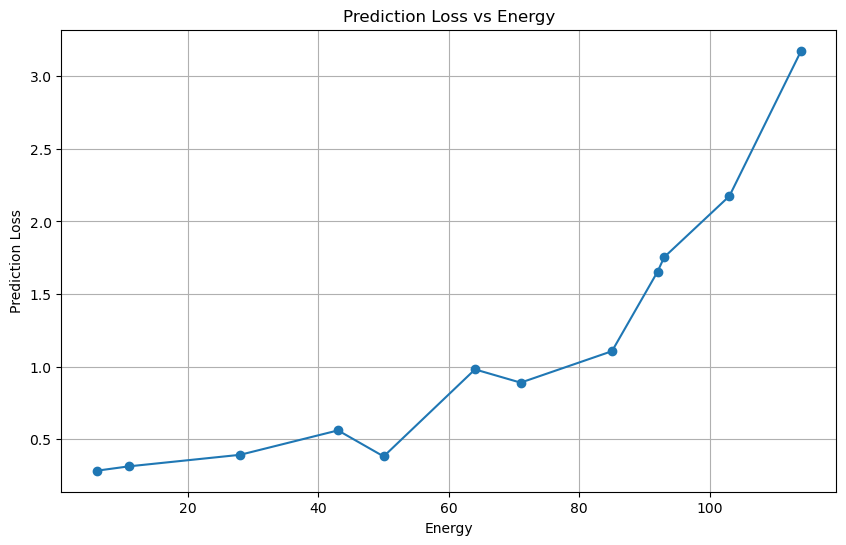

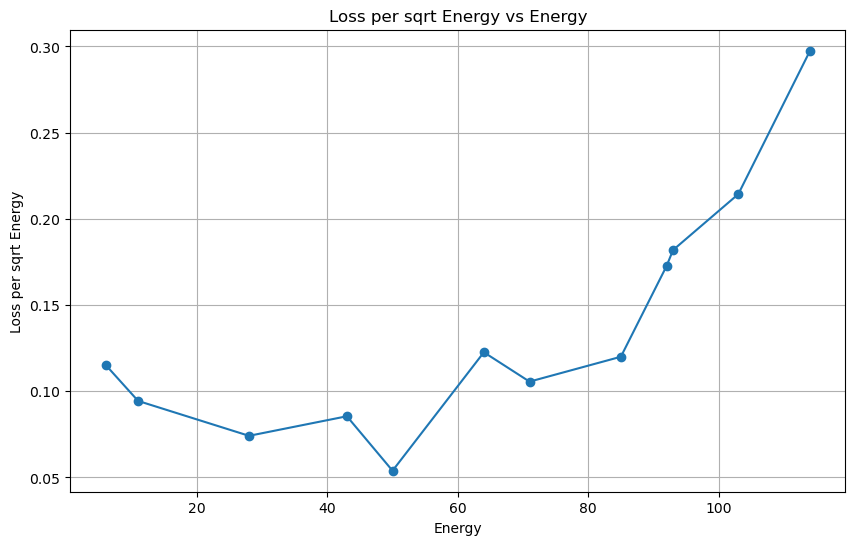

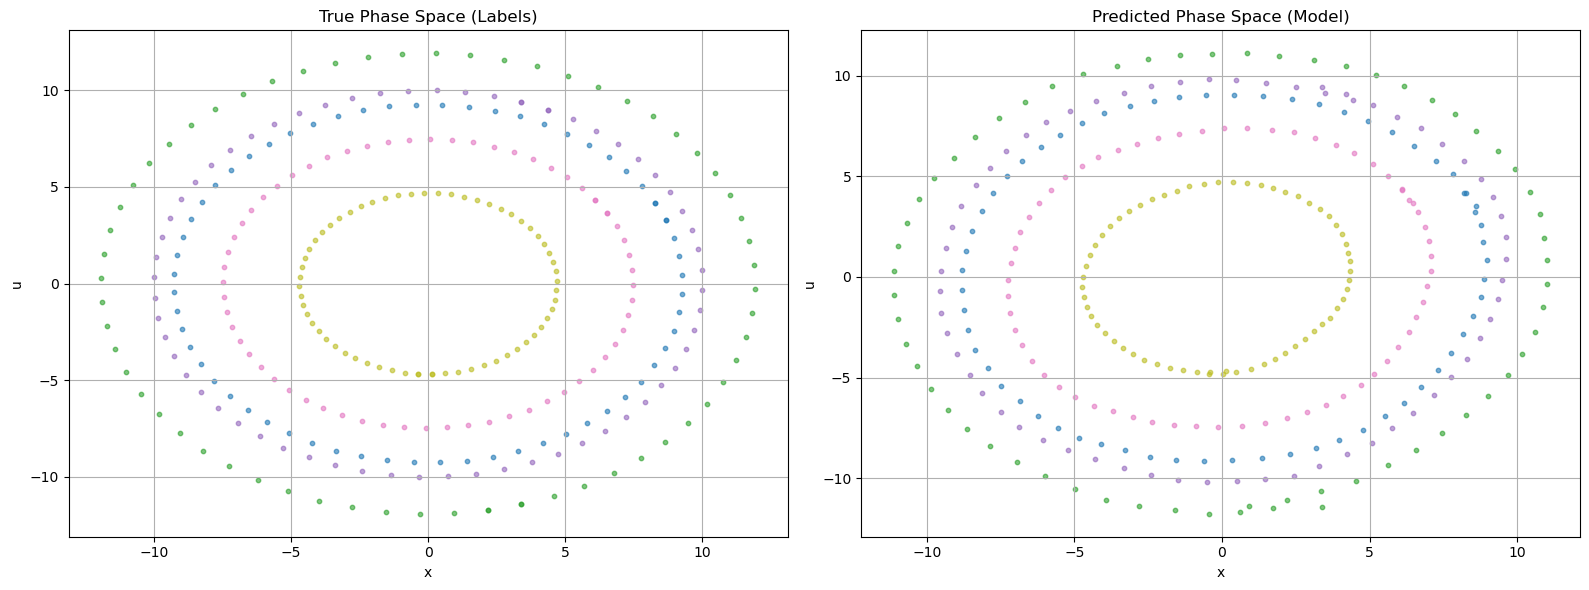

In [24]:
prediction_val_ensemble_df, mean_prediction_loss_val_ensemble, _ = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df, test_df=val_df, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, recreate_and_plot_phase_space=True, plot_specific_portion=0.26, connect_points=False, plot_trajectories_subsample=0.4, max_t_training=max_t_training, efficiently=False, threshold=0.8947378594655051, search_range_lower_pct=0.1, search_range_upper_pct=0.5031434228967245, verbose=True)

     trajectory_id      energy  variance_loss  variance_per_sqrt_energy
6                6    6.000950            0.0                       0.0
11              11   11.000909            0.0                       0.0
28              28   28.000769            0.0                       0.0
43              43   43.000645            0.0                       0.0
50              50   50.000587            0.0                       0.0
64              64   64.000471            0.0                       0.0
71              71   71.000413            0.0                       0.0
85              85   85.000298            0.0                       0.0
92              92   92.000240            0.0                       0.0
93              93   93.000231            0.0                       0.0
103            103  103.000149            0.0                       0.0
114            114  114.000058            0.0                       0.0
Mean prediction loss over full dataframe: 0.0000


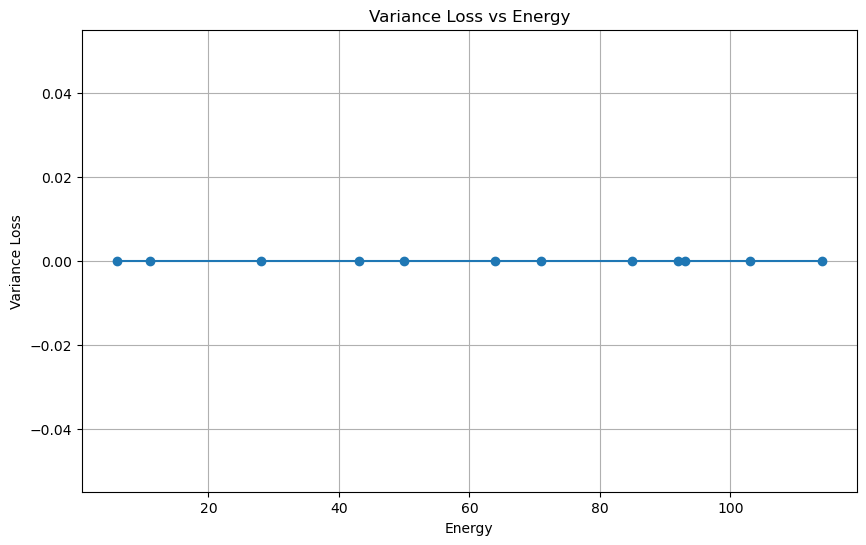

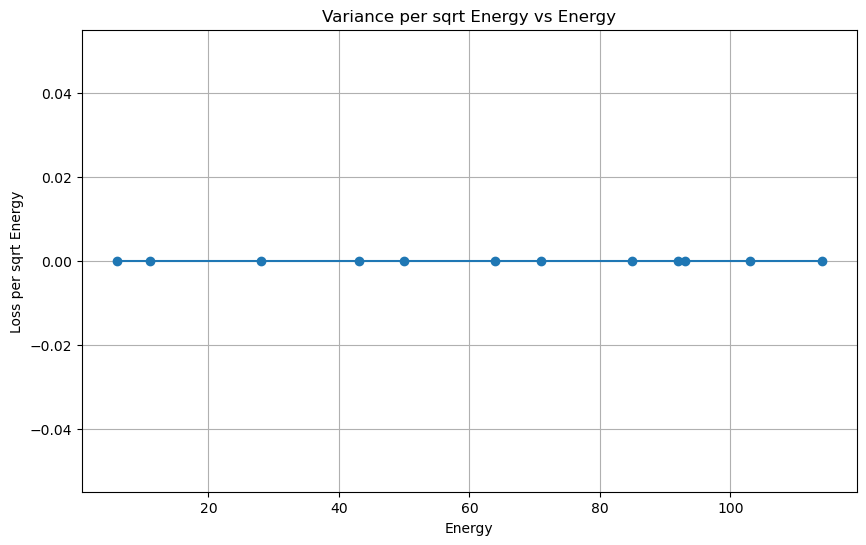

In [22]:
variance_val_df, mean_variance_loss_val = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=val_id_df, test_df=val_df, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed)


In [26]:
trajectory_id_val = 64
trajectory_id_val_ensemble = 50


=== Efficient Method - Forward Pass Count ===
mapping_net calls: 1
inverse_net calls: 1
Total forward passes: 2
Observed time points: [0.]


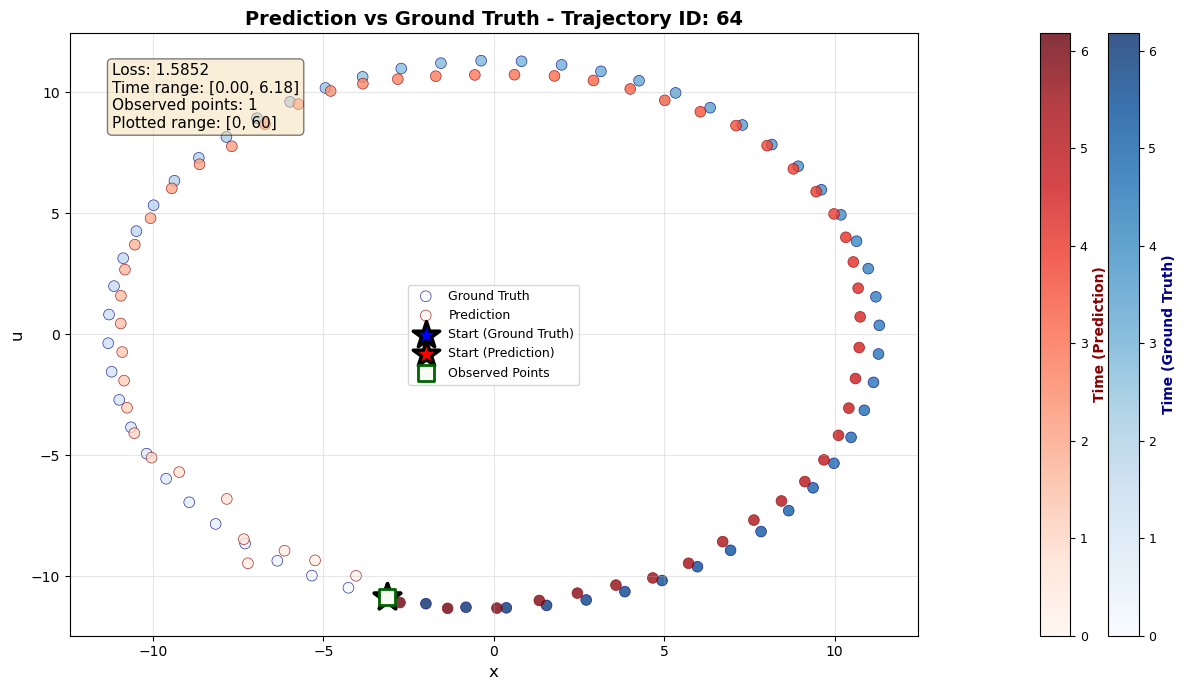

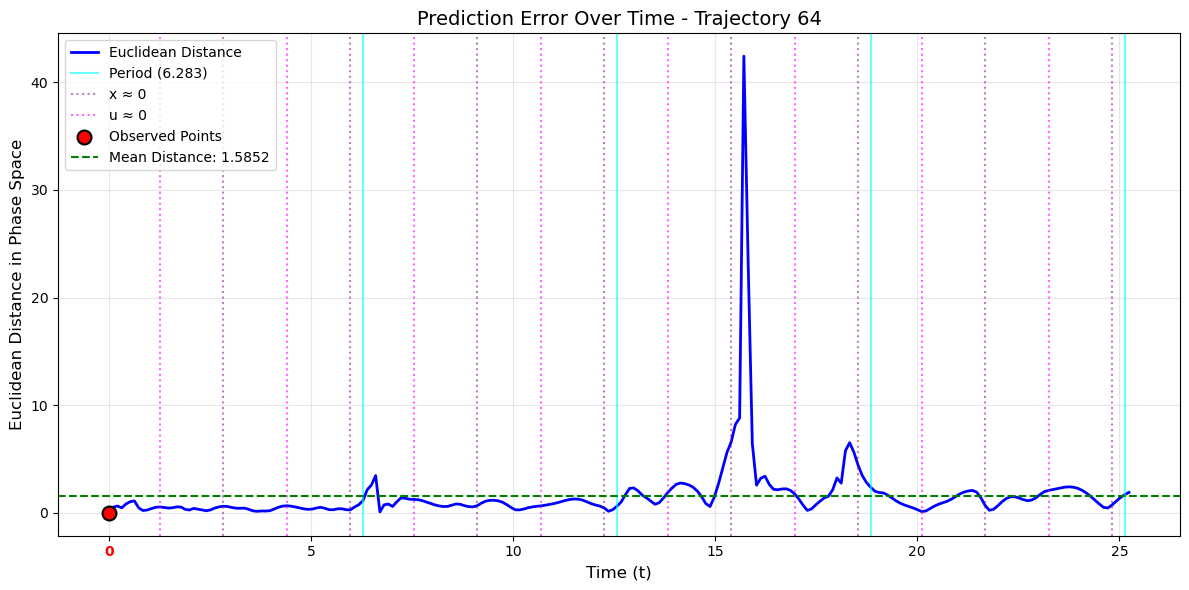

In [28]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df, test_df=val_df, trajectory_id=trajectory_id_val, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, connect_points=False, portion_to_visualize=[0,60], show_zeroings=True, show_period=True, period=period, max_t_training=max_t_training, efficiently=True, threshold=1.0, search_range_lower_pct=0.5, search_range_upper_pct=0.6, verbose=True)


=== Ensemble Method - Forward Pass Count ===
mapping_net calls: 3
inverse_net calls: 725
Total forward passes: 728
Coverage: 100.0%
Observed time points: [0.]


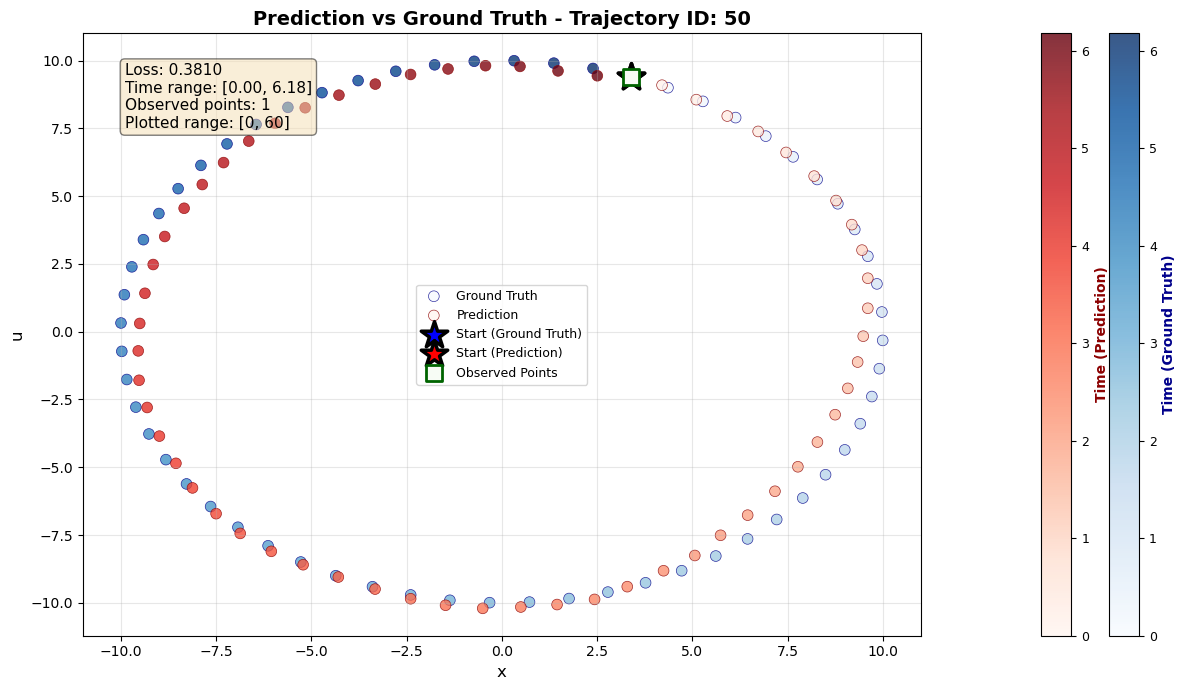

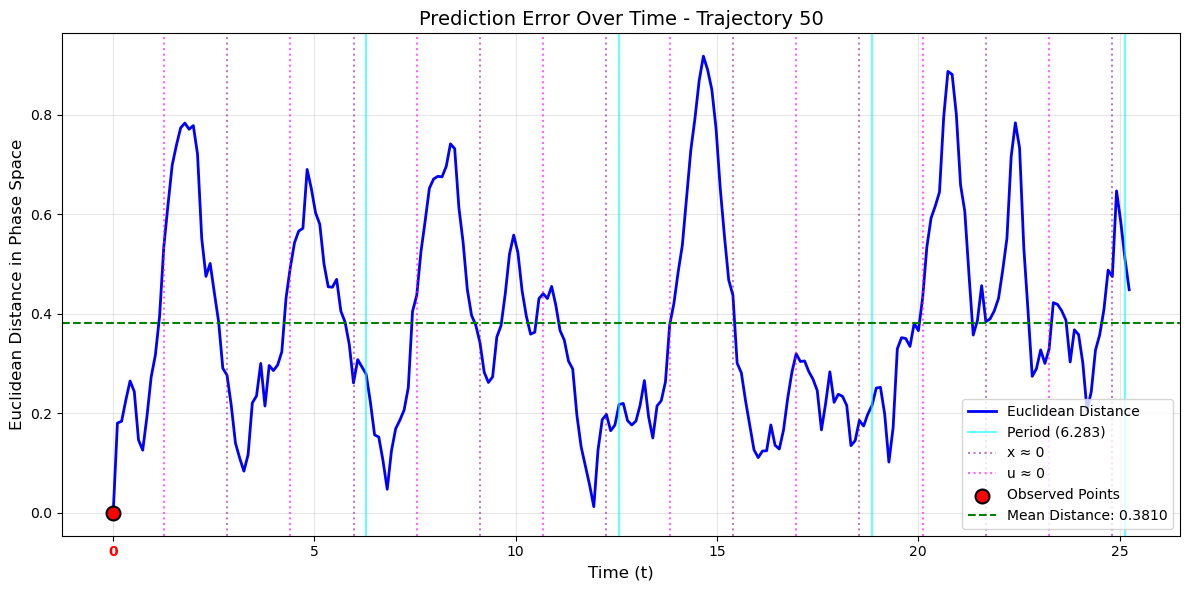

In [27]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df, test_df=val_df, trajectory_id=trajectory_id_val_ensemble, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, connect_points=False, portion_to_visualize=[0,60], show_zeroings=True, show_period=True, period=period, max_t_training=max_t_training, efficiently=False, threshold=0.8947378594655051, search_range_lower_pct=0.1, search_range_upper_pct=0.5031434228967245, verbose=True)

     trajectory_id      energy  prediction_loss  loss_per_sqrt_energy
7                7    7.000942         2.192543              0.828648
12              12   12.000901         1.834134              0.529449
32              32   32.000736         3.254346              0.575286
37              37   37.000694         1.909807              0.313967
39              39   39.000678         2.695137              0.431564
53              53   53.000562         1.615241              0.221869
57              57   57.000529         5.661327              0.749858
67              67   67.000446         4.643159              0.567250
75              75   75.000380         2.967415              0.342647
81              81   81.000331         2.231805              0.247978
88              88   88.000273         1.686714              0.179804
101            101  101.000165         3.485614              0.346831
117            117  117.000033         3.215473              0.297271
Mean prediction loss

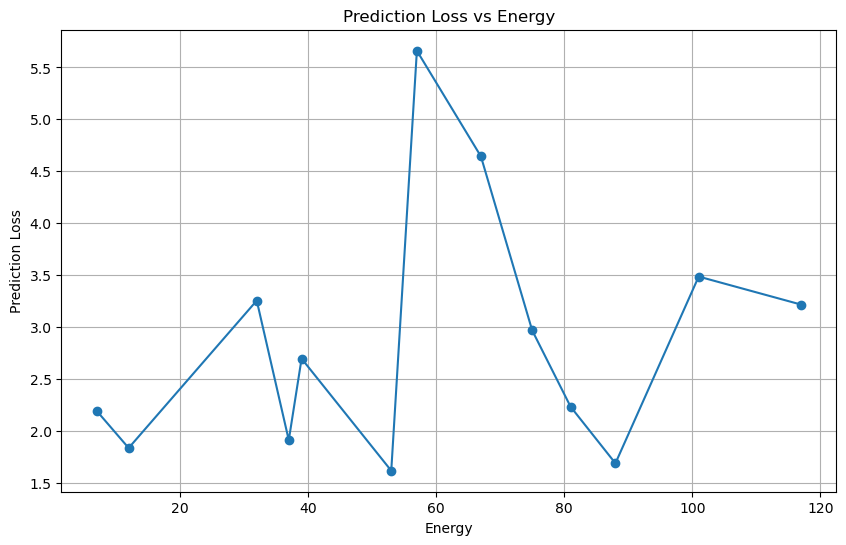

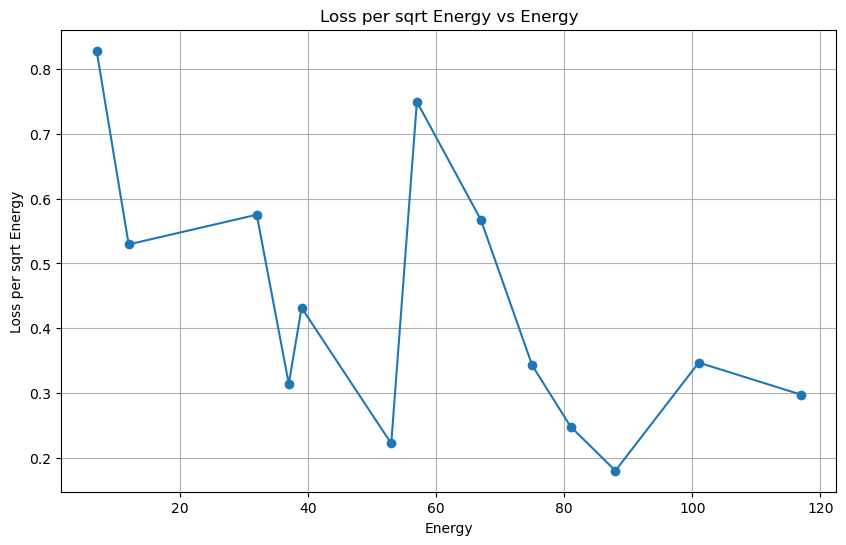

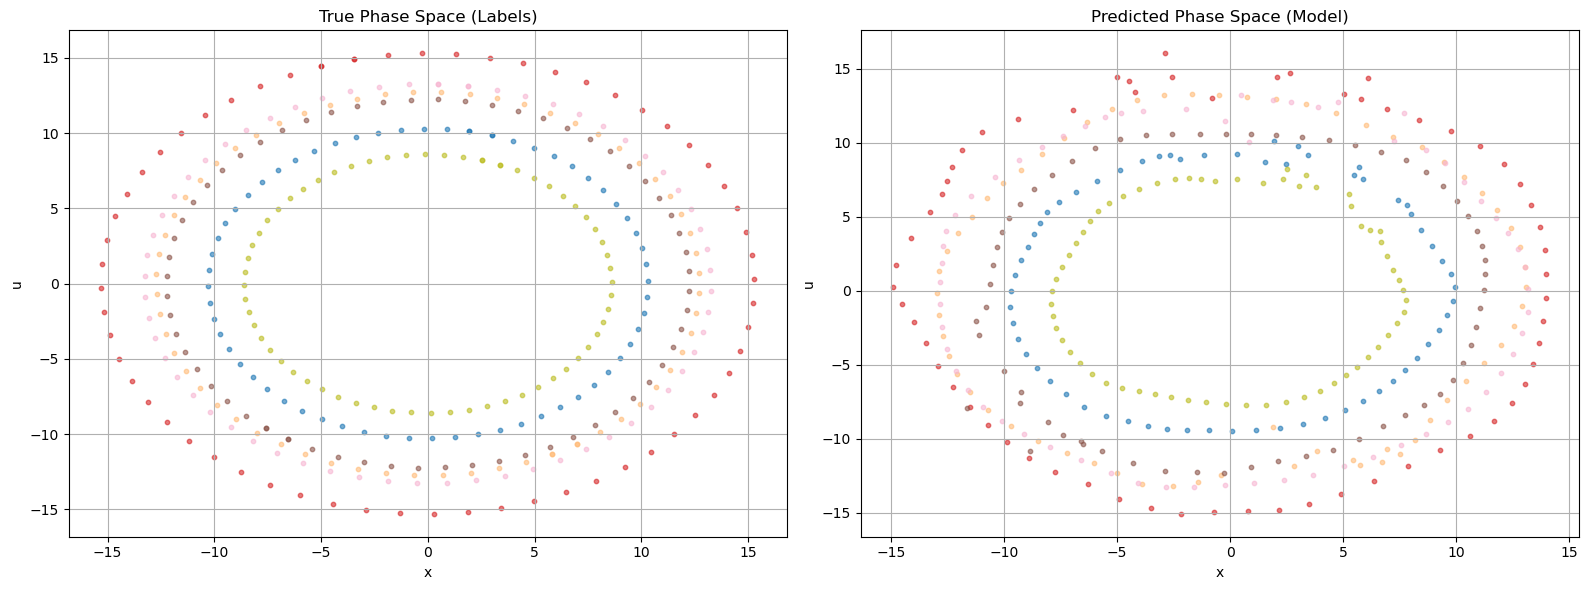

In [ ]:
prediction_test_df, mean_prediction_loss_test, pred_test_df = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df, test_df=test_df, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, recreate_and_plot_phase_space=True, plot_specific_portion=0.26, connect_points=False, plot_trajectories_subsample=0.4, max_t_training=max_t_training, efficiently=True, threshold=1.0, search_range_lower_pct=0.5, search_range_upper_pct=0.6, verbose=True)

     trajectory_id      energy  prediction_loss  loss_per_sqrt_energy
7                7    7.000942         0.296699              0.112134
12              12   12.000901         0.310555              0.089646
32              32   32.000736         0.605300              0.107002
37              37   37.000694         0.364204              0.059874
39              39   39.000678         0.508481              0.081421
53              53   53.000562         0.809777              0.111231
57              57   57.000529         0.860926              0.114032
67              67   67.000446         0.747229              0.091288
75              75   75.000380         0.979236              0.113072
81              81   81.000331         1.071339              0.119037
88              88   88.000273         1.319916              0.140703
101            101  101.000165         1.971119              0.196134
117            117  117.000033         3.679350              0.340156
Mean prediction loss

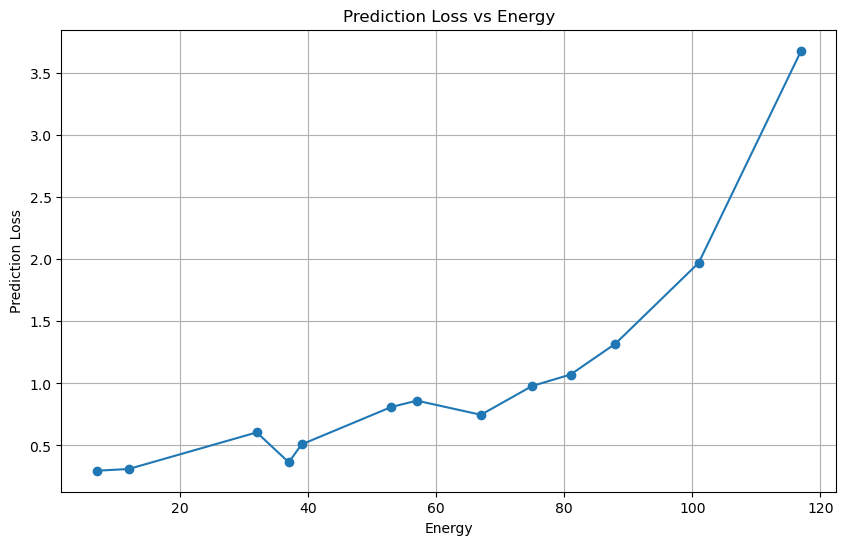

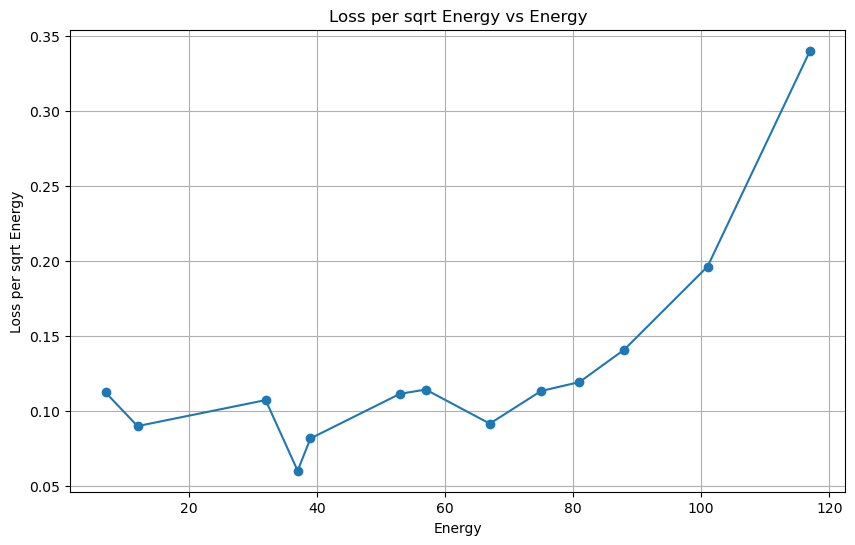

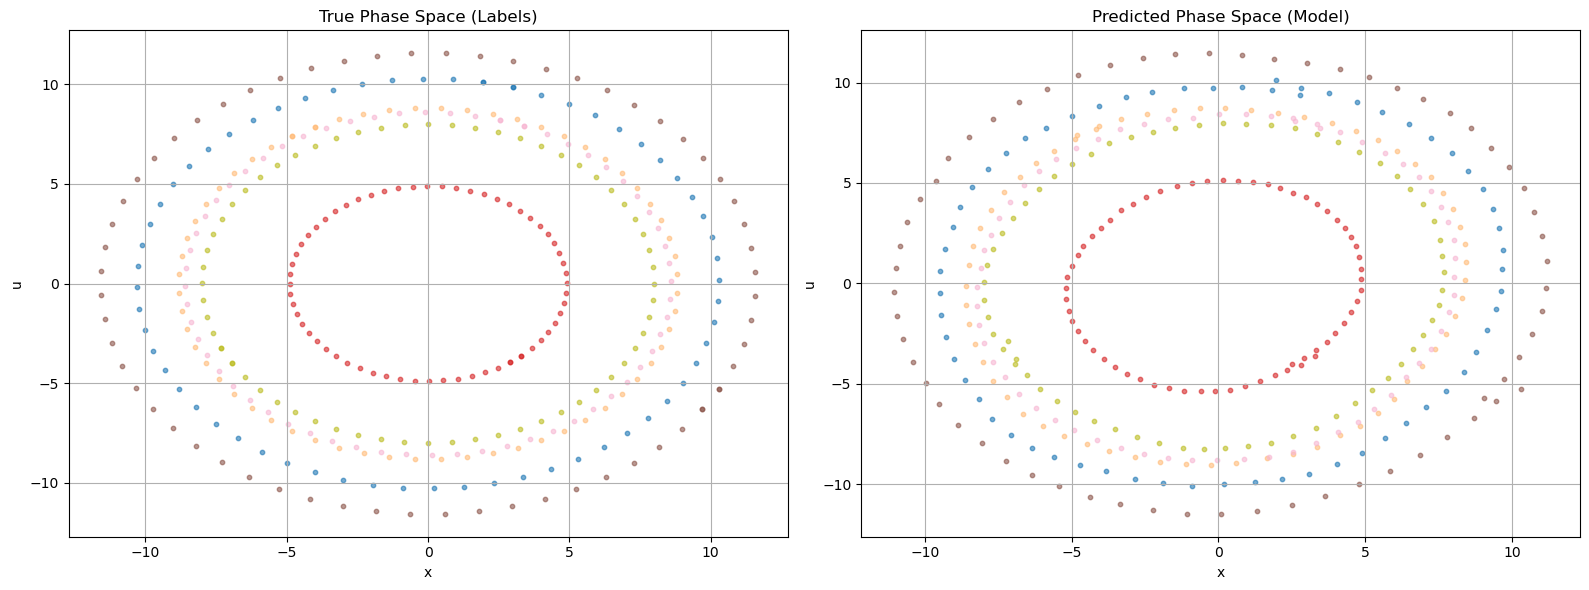

In [29]:
prediction_test_ensemble_df, mean_prediction_loss_test_ensemble, pred_test_ensemble_df = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df, test_df=test_df, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, recreate_and_plot_phase_space=True, plot_specific_portion=0.26, connect_points=False, plot_trajectories_subsample=0.4, max_t_training=max_t_training, efficiently=False, threshold=0.8947378594655051, search_range_lower_pct=0.1, search_range_upper_pct=0.5031434228967245, verbose=True)

     trajectory_id      energy  variance_loss  variance_per_sqrt_energy
7                7    7.000942            0.0                       0.0
12              12   12.000901            0.0                       0.0
32              32   32.000736            0.0                       0.0
37              37   37.000694            0.0                       0.0
39              39   39.000678            0.0                       0.0
53              53   53.000562            0.0                       0.0
57              57   57.000529            0.0                       0.0
67              67   67.000446            0.0                       0.0
75              75   75.000380            0.0                       0.0
81              81   81.000331            0.0                       0.0
88              88   88.000273            0.0                       0.0
101            101  101.000165            0.0                       0.0
117            117  117.000033            0.0                   

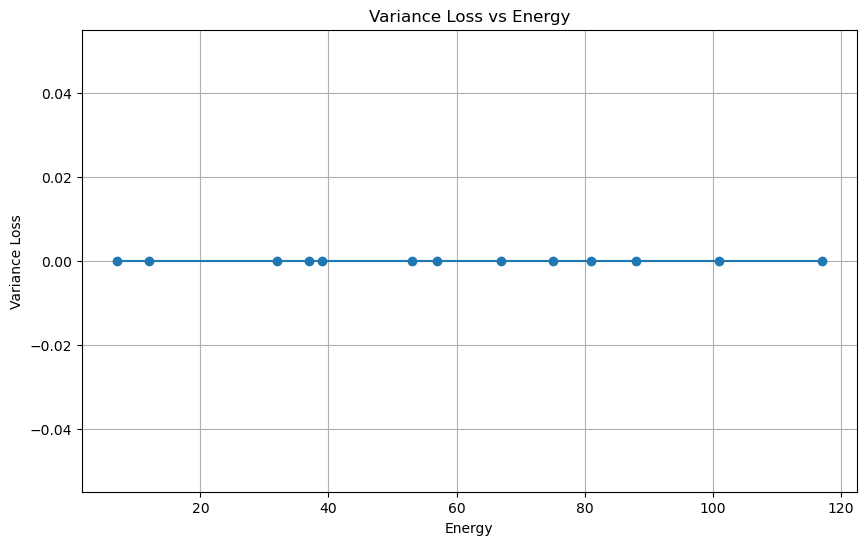

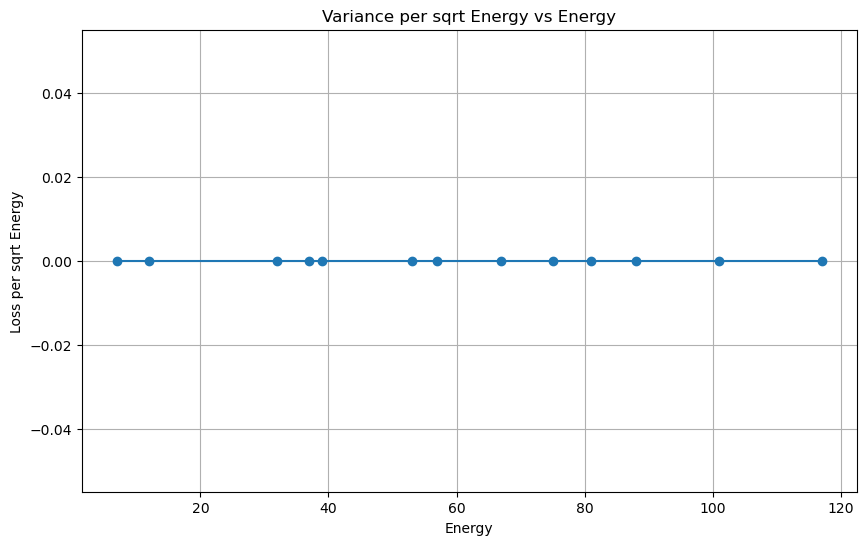

In [45]:
variance_test_df, mean_variance_loss_test = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=test_id_df, test_df=test_df, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed)


In [30]:
trajectory_id_test = 88
trajectory_id_test_ensemble = 37


=== Efficient Method - Forward Pass Count ===
mapping_net calls: 1
inverse_net calls: 1
Total forward passes: 2
Observed time points: [0.]


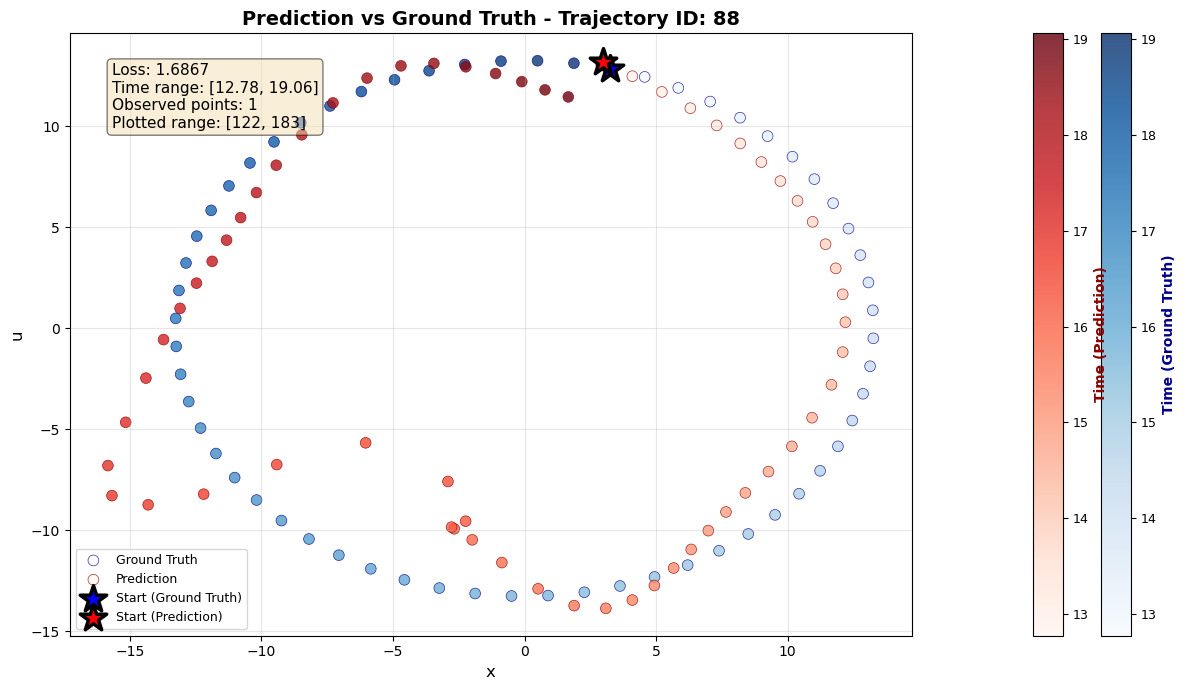

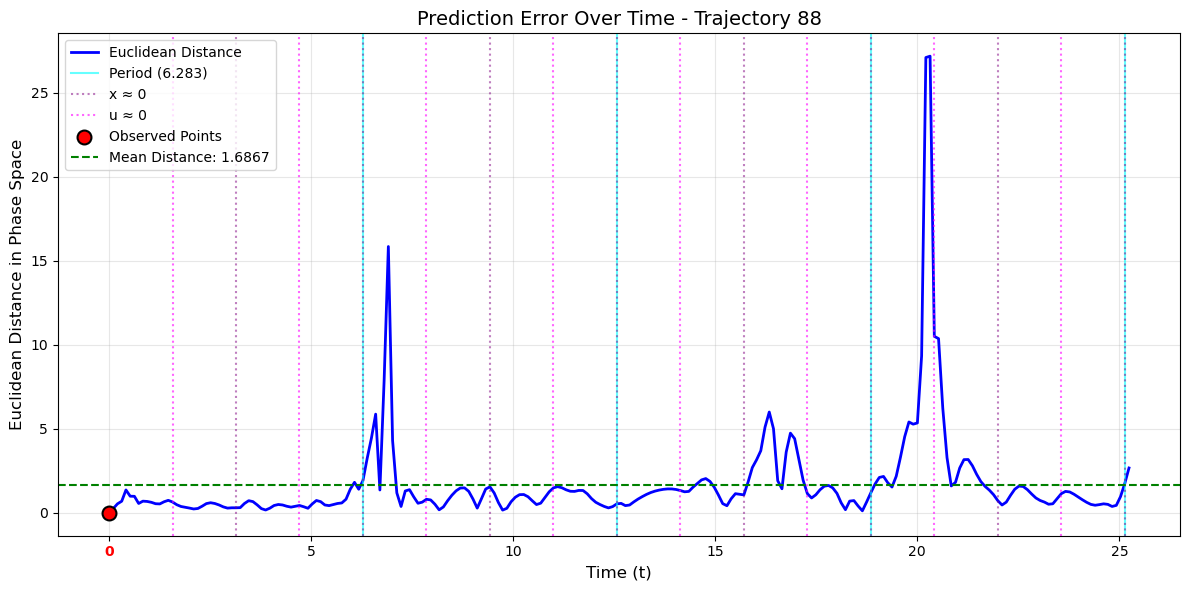

In [31]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df, test_df=test_df, trajectory_id=trajectory_id_test, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, connect_points=False, portion_to_visualize=[122,183], show_zeroings=True, show_period=True, period=period, max_t_training=max_t_training, efficiently=True, threshold=1.0, search_range_lower_pct=0.5, search_range_upper_pct=0.6, verbose=True)


=== Ensemble Method - Forward Pass Count ===
mapping_net calls: 3
inverse_net calls: 725
Total forward passes: 728
Coverage: 100.0%
Observed time points: [0.]


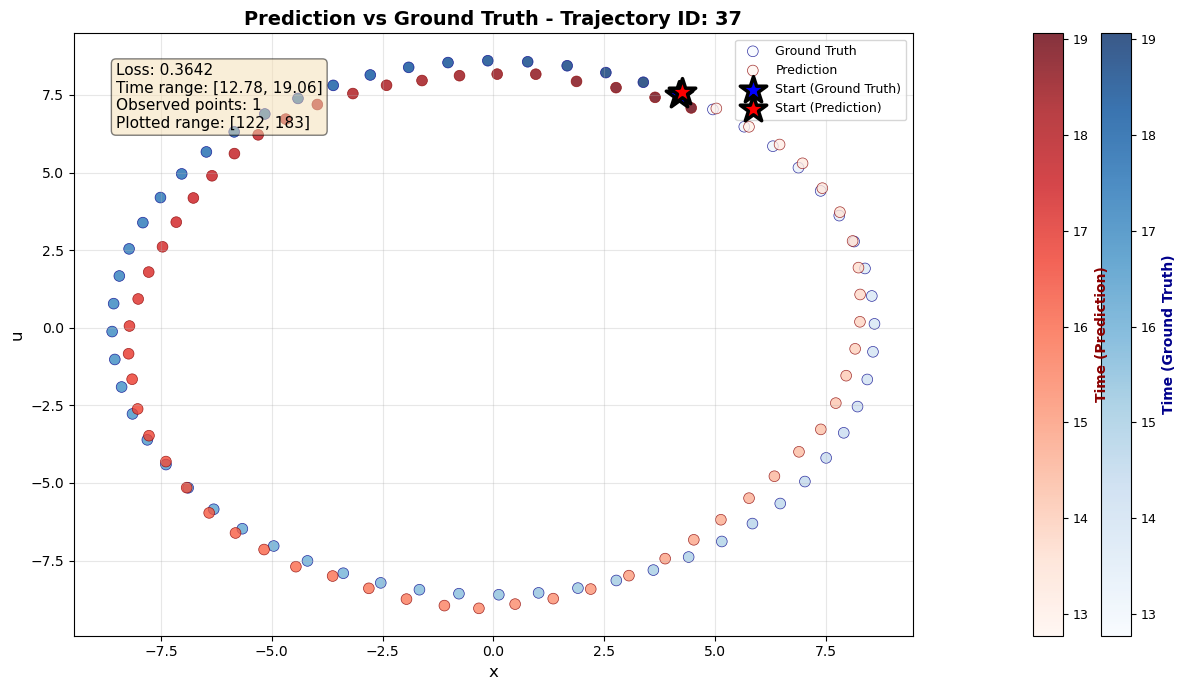

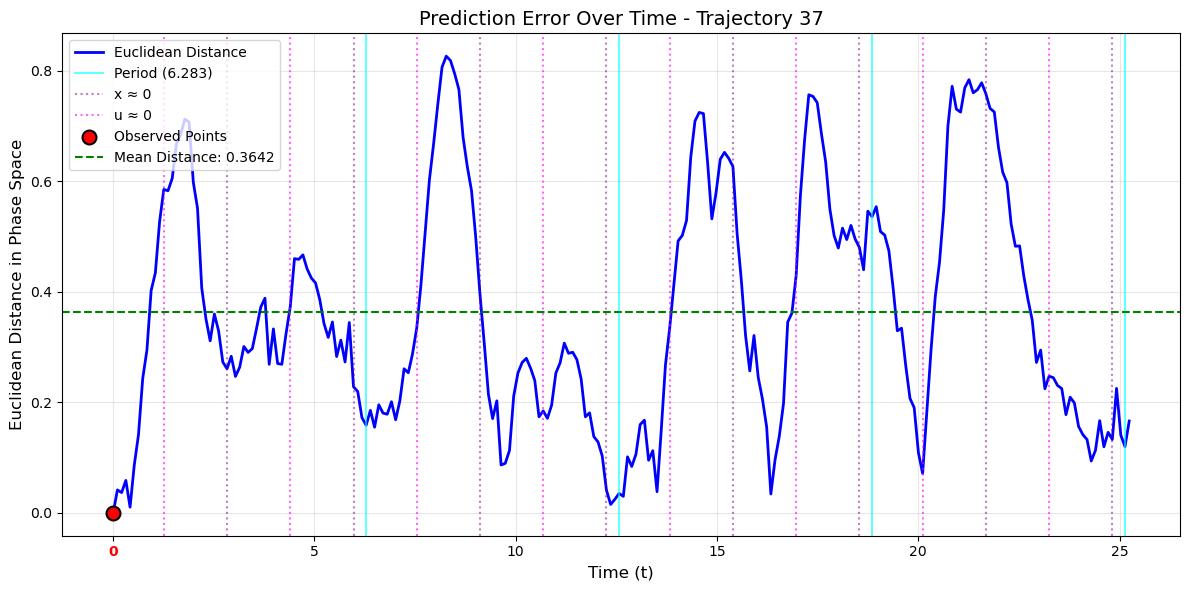

In [32]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df, test_df=test_df, trajectory_id=trajectory_id_test_ensemble, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, connect_points=False, portion_to_visualize=[122,183], show_zeroings=True, show_period=True, period=period, max_t_training=max_t_training, efficiently=False, threshold=0.8947378594655051, search_range_lower_pct=0.1, search_range_upper_pct=0.5031434228967245, verbose=True)

In [18]:
print(f"The max energy of a trajectory in the training set is: {train_id_df['energy'].max():.3f}\nThe high energy testing set has energies in the range: {test_id_df_high_energy_revised['energy'].min():.3f}-{test_id_df_high_energy_revised['energy'].max():.3f}")

The max energy of a trajectory in the training set is: 120.000
The high energy testing set has energies in the range: 129.710-247.290


In [36]:
point_indexes_observed_high_energy = [0]

    trajectory_id      energy  prediction_loss  loss_per_sqrt_energy
2               2  129.709677         1.454962              0.127751
4               4  138.419355         2.640280              0.224415
5               5  142.774194         7.234293              0.605440
6               6  147.129032         2.924881              0.241134
9               9  160.193548         4.272266              0.337548
10             10  164.548387        21.010092              1.637876
12             12  173.258065         4.924386              0.374115
14             14  181.967742         5.104786              0.378425
15             15  186.322581        18.279968              1.339192
17             17  195.032258         4.633112              0.331757
19             19  203.741935        10.904163              0.763927
20             20  208.096774         3.872711              0.268462
22             22  216.806452         9.443409              0.641346
26             26  234.225806     

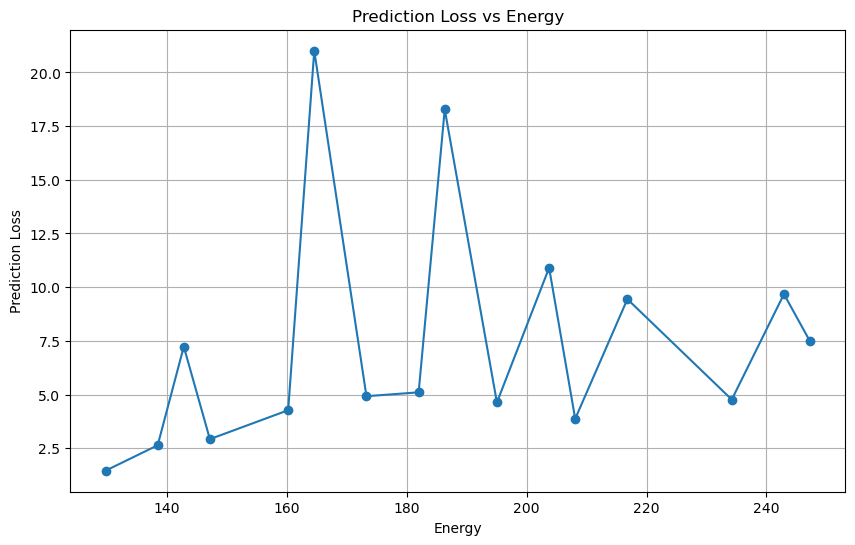

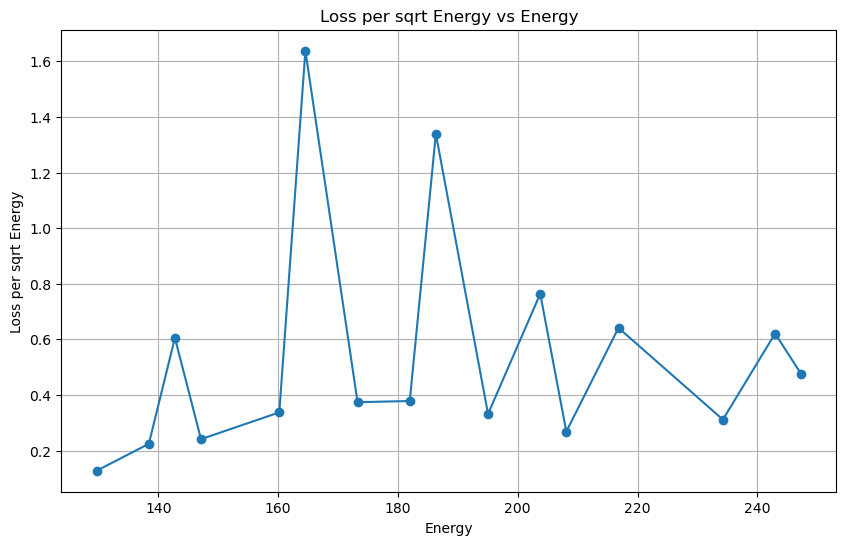

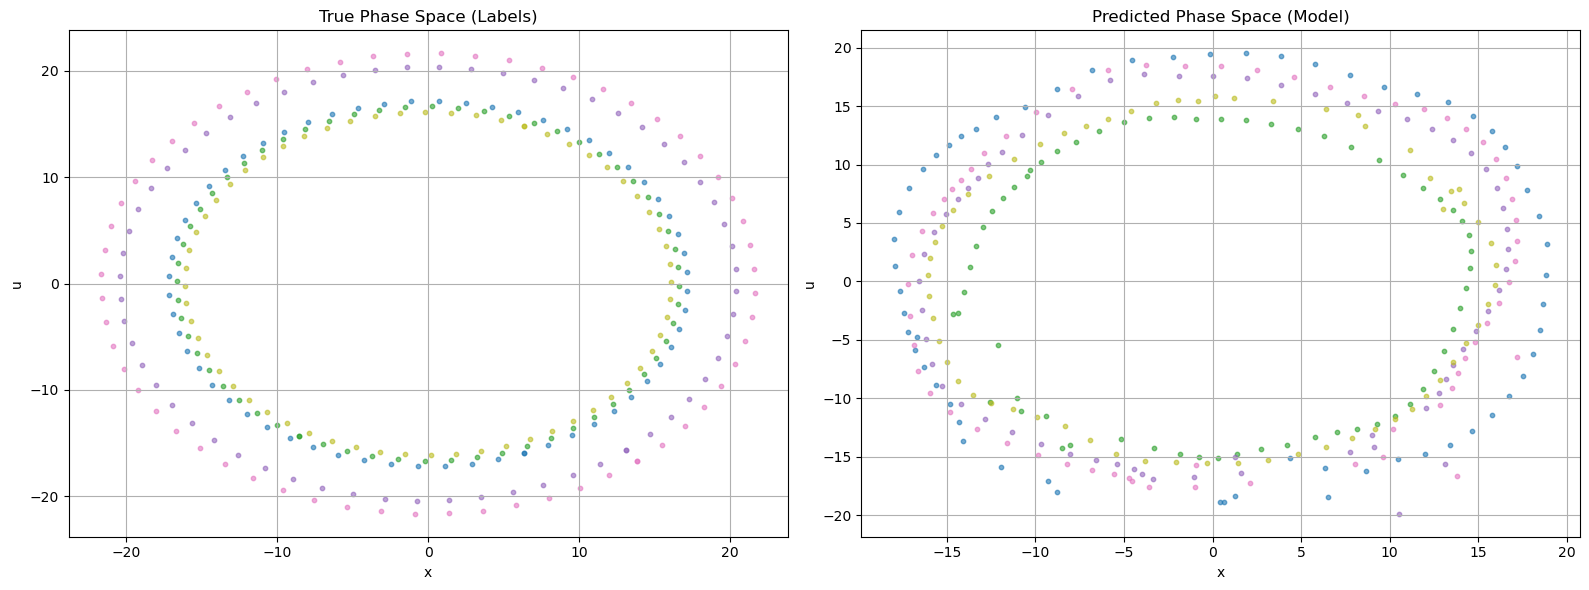

In [39]:
prediction_test_high_energy_df, mean_prediction_loss_test_high_energy, pred_test_high_energy_df = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_high_energy_revised, test_df=test_df_high_energy_revised, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed_high_energy, recreate_and_plot_phase_space=True, plot_specific_portion=1.0, connect_points=False, plot_trajectories_subsample=0.3, max_t_training=max_t_training, efficiently=True, threshold=1.0, search_range_lower_pct=0.5, search_range_upper_pct=0.6, verbose=True)

    trajectory_id      energy  prediction_loss  loss_per_sqrt_energy
2               2  129.709677         1.129822              0.099203
4               4  138.419355         0.858041              0.072931
5               5  142.774194         1.088206              0.091072
6               6  147.129032         1.096089              0.090364
9               9  160.193548         1.740642              0.137527
10             10  164.548387         1.552716              0.121045
12             12  173.258065         2.675845              0.203289
14             14  181.967742         2.398847              0.177830
15             15  186.322581         1.888406              0.138345
17             17  195.032258         1.574595              0.112750
19             19  203.741935         1.944392              0.136221
20             20  208.096774         1.999207              0.138588
22             22  216.806452         3.905828              0.265263
26             26  234.225806     

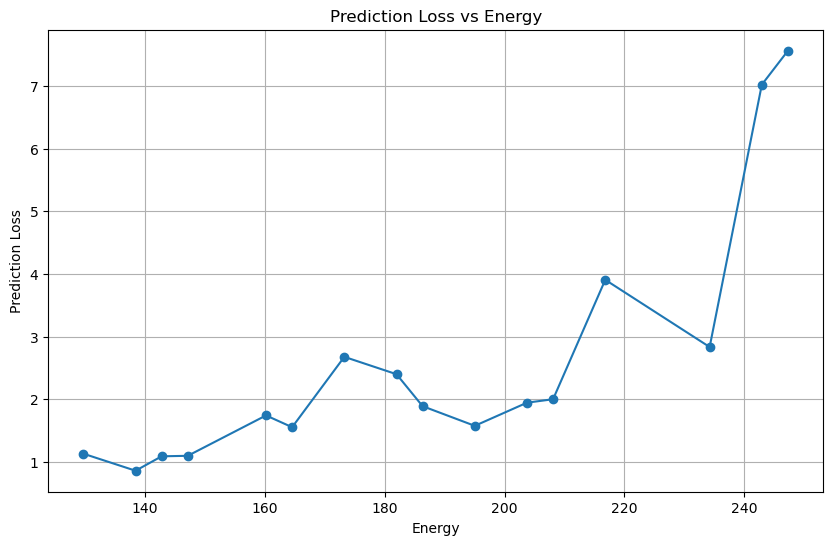

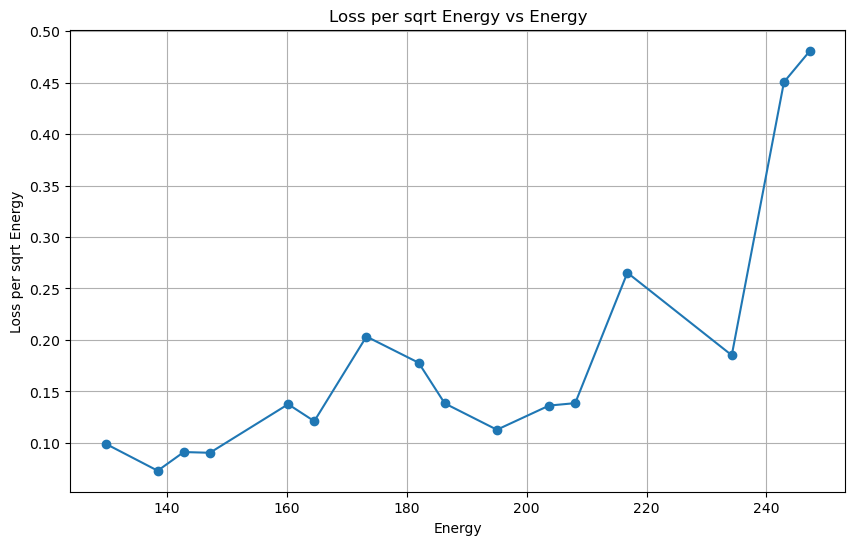

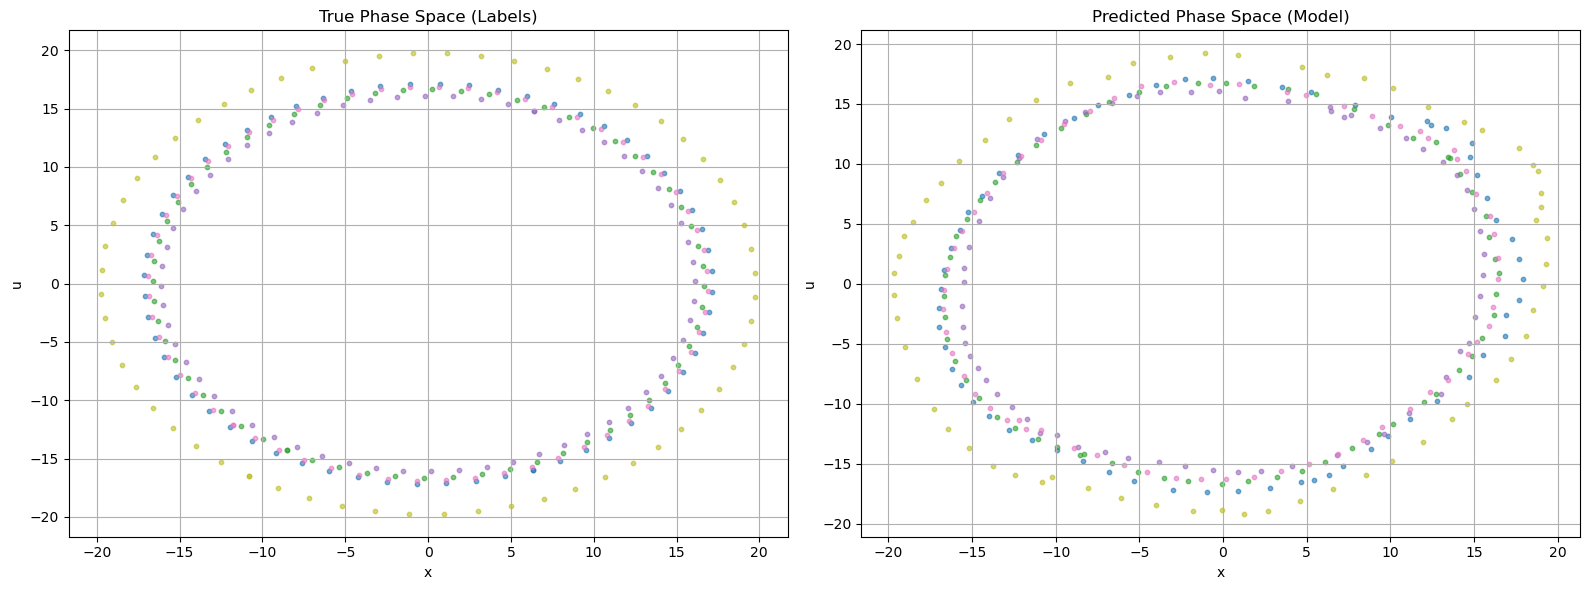

In [38]:
prediction_test_ensemble_high_energy_df, mean_prediction_loss_test_ensemble_high_energy, pred_test_ensemble_high_energy_df = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_high_energy_revised, test_df=test_df_high_energy_revised, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed_high_energy, recreate_and_plot_phase_space=True, plot_specific_portion=1.0, connect_points=False, plot_trajectories_subsample=0.3, max_t_training=max_t_training, efficiently=False, threshold=0.8947378594655051, search_range_lower_pct=0.1, search_range_upper_pct=0.5031434228967245, verbose=True)

    trajectory_id      energy  variance_loss  variance_per_sqrt_energy
2               2  129.709677            0.0                       0.0
4               4  138.419355            0.0                       0.0
5               5  142.774194            0.0                       0.0
6               6  147.129032            0.0                       0.0
9               9  160.193548            0.0                       0.0
10             10  164.548387            0.0                       0.0
12             12  173.258065            0.0                       0.0
14             14  181.967742            0.0                       0.0
15             15  186.322581            0.0                       0.0
17             17  195.032258            0.0                       0.0
19             19  203.741935            0.0                       0.0
20             20  208.096774            0.0                       0.0
22             22  216.806452            0.0                       0.0
26    

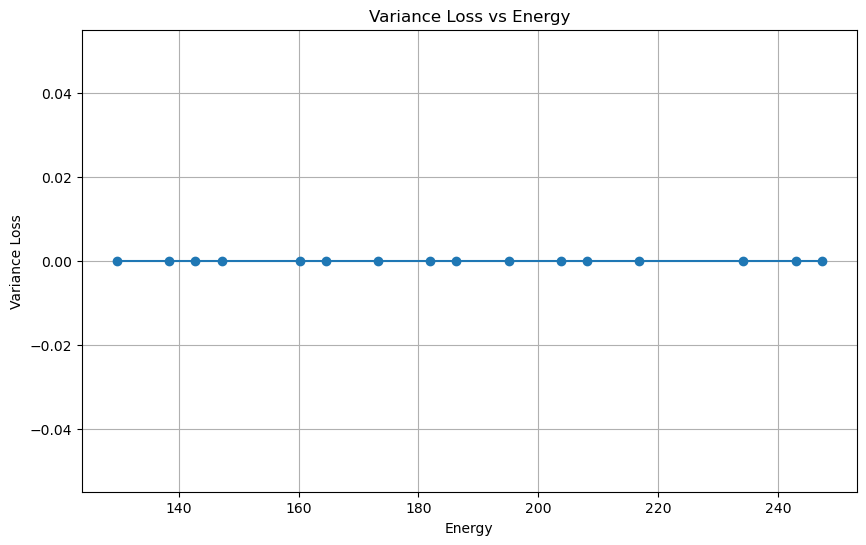

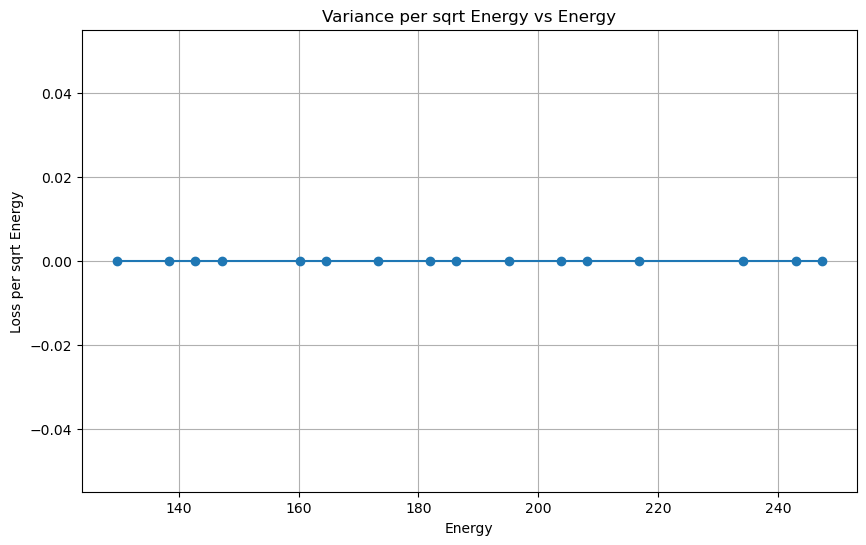

In [70]:
variance_test_high_energy_df, mean_variance_loss_test_high_energy = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=test_id_df_high_energy_revised, test_df=test_df_high_energy_revised, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed_high_energy)


In [40]:
trajectory_id_high_energy = 2
trajectory_id_high_energy_ensemble = 20


=== Efficient Method - Forward Pass Count ===
mapping_net calls: 1
inverse_net calls: 1
Total forward passes: 2
Observed time points: [0.]


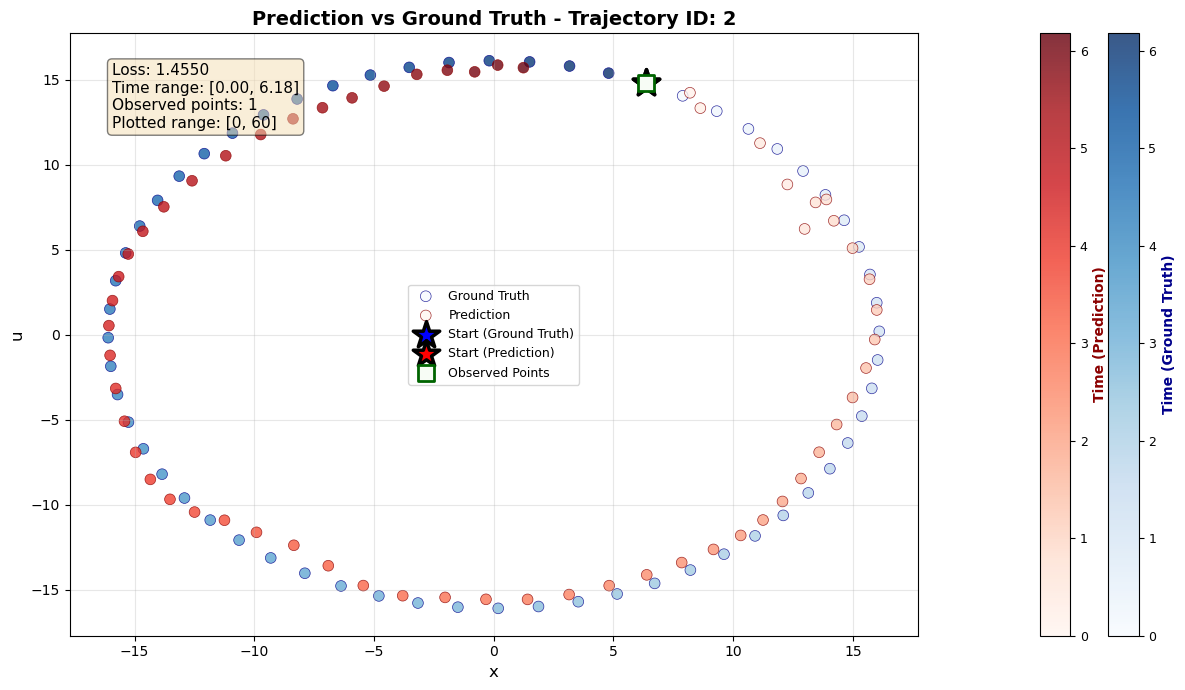

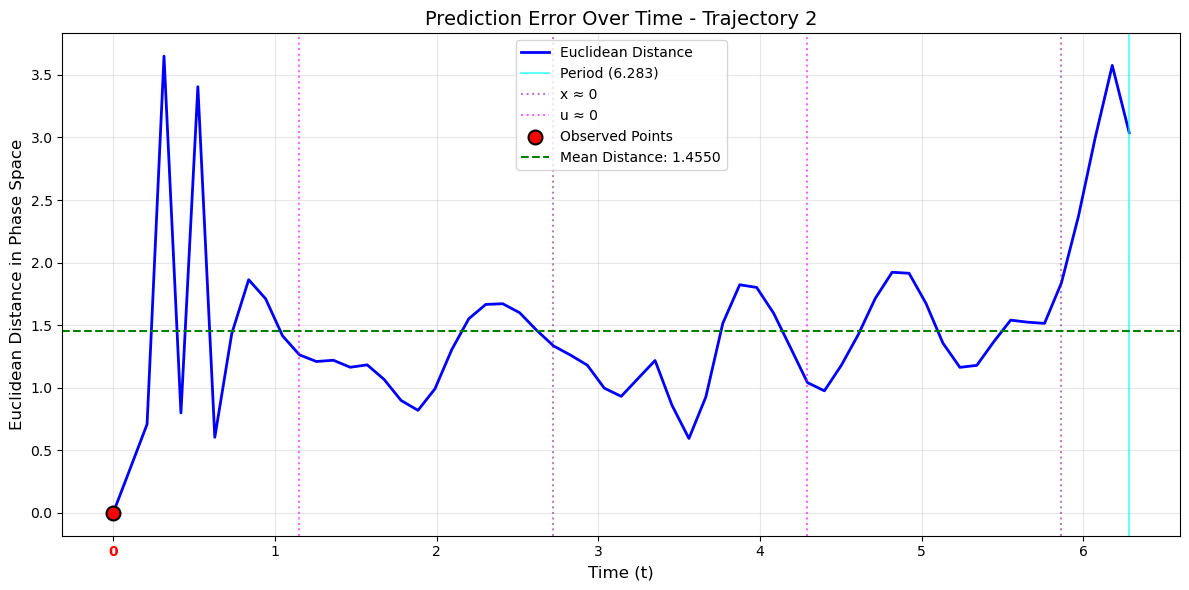

In [43]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_high_energy_revised, test_df=test_df_high_energy_revised, trajectory_id=trajectory_id_high_energy, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed_high_energy, connect_points=False, portion_to_visualize=[0,60], show_zeroings=True, show_period=True, period=period,max_t_training=max_t_training, efficiently=True, threshold=1.0, search_range_lower_pct=0.5, search_range_upper_pct=0.6, verbose=True)


=== Ensemble Method - Forward Pass Count ===
mapping_net calls: 1
inverse_net calls: 61
Total forward passes: 62
Coverage: 100.0%
Observed time points: [0.]


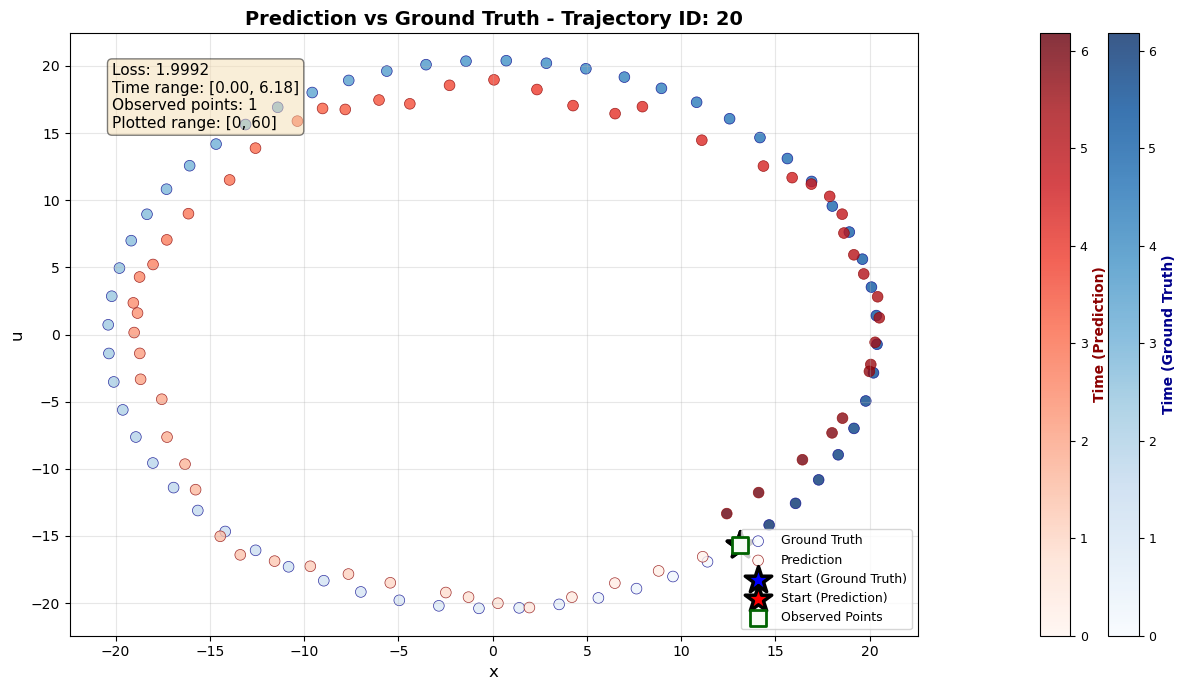

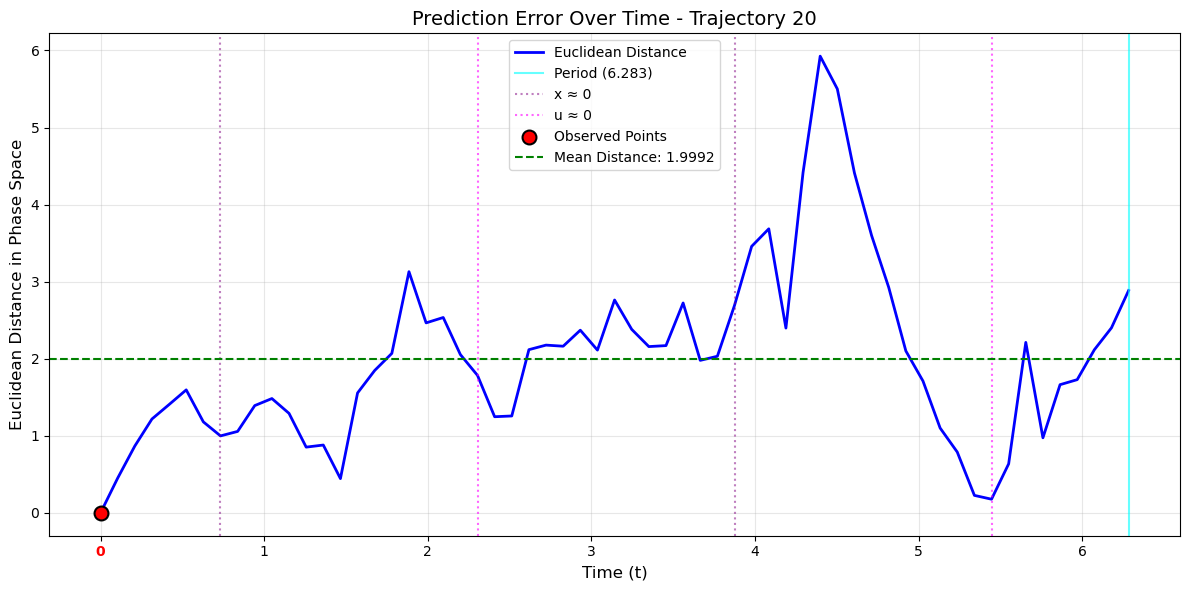

In [44]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_high_energy_revised, test_df=test_df_high_energy_revised, trajectory_id=trajectory_id_high_energy_ensemble, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed_high_energy, connect_points=False, portion_to_visualize=[0,60], show_zeroings=True, show_period=True, period=period, max_t_training=max_t_training, efficiently=False, threshold=0.8947378594655051, search_range_lower_pct=0.1, search_range_upper_pct=0.5031434228967245, verbose=True)

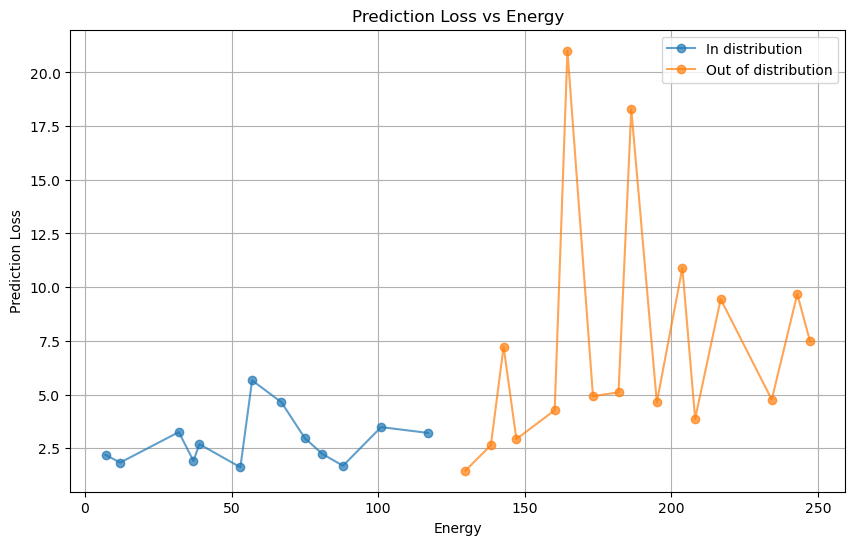

In [23]:
plot_prediction_losses([prediction_test_df, prediction_test_high_energy_df])

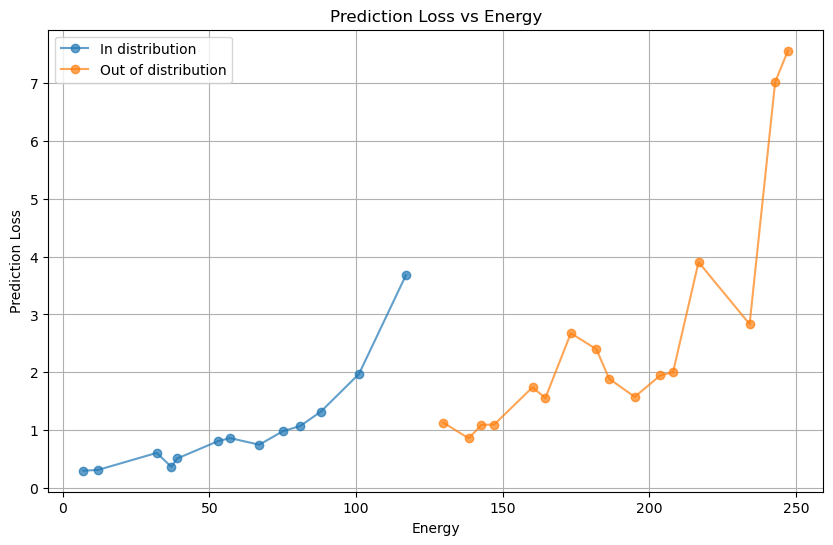

In [45]:
plot_prediction_losses([prediction_test_ensemble_df, prediction_test_ensemble_high_energy_df])

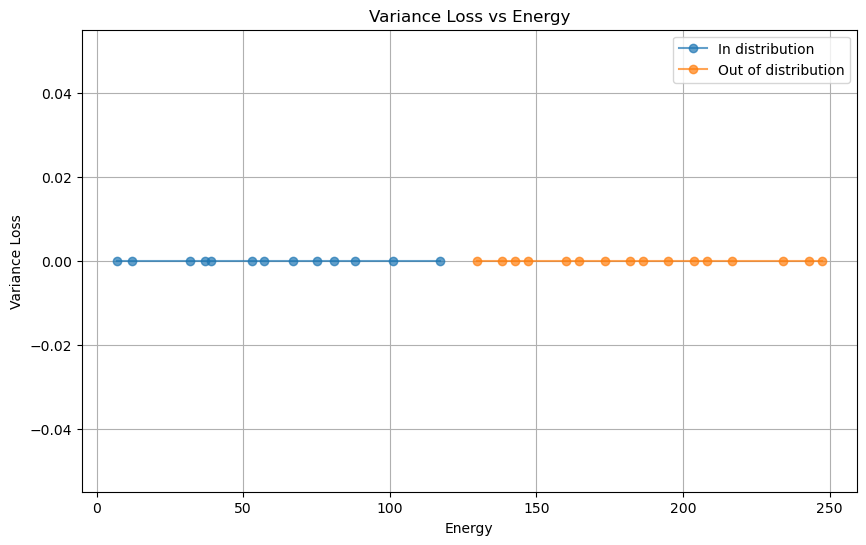

In [46]:
plot_variance_losses([variance_test_df, variance_test_high_energy_df])

Step 1 gamma values mean: 1.814±2.750

Step 2 gamma values mean: 2.105±2.327



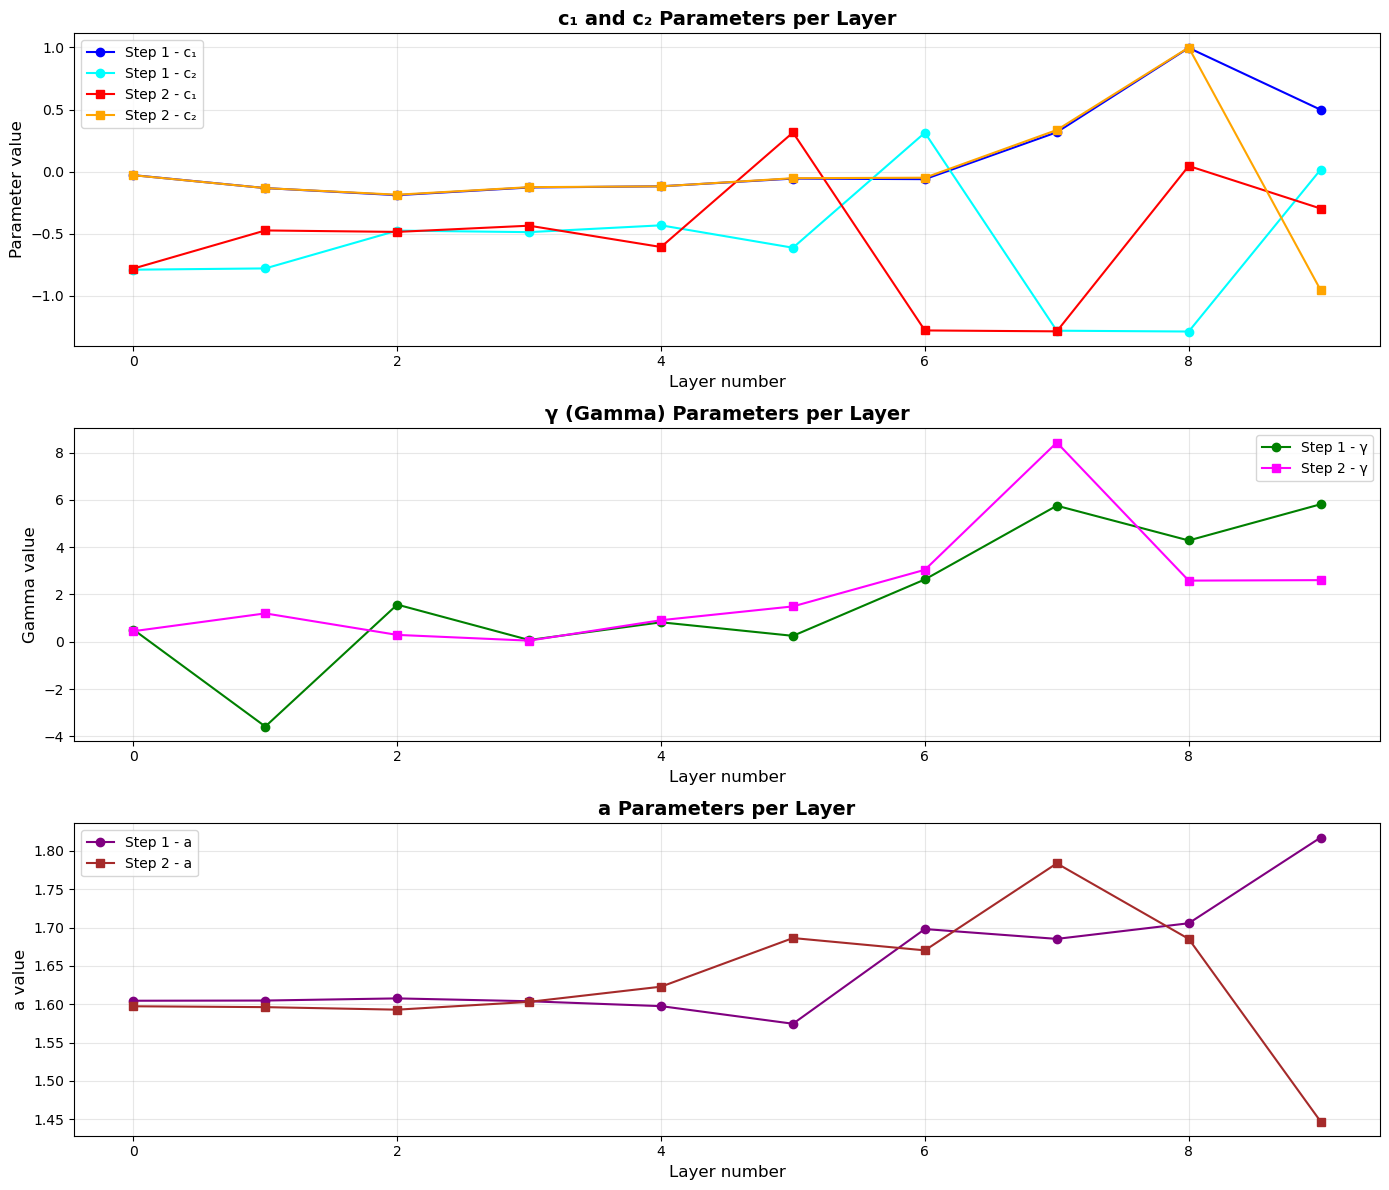

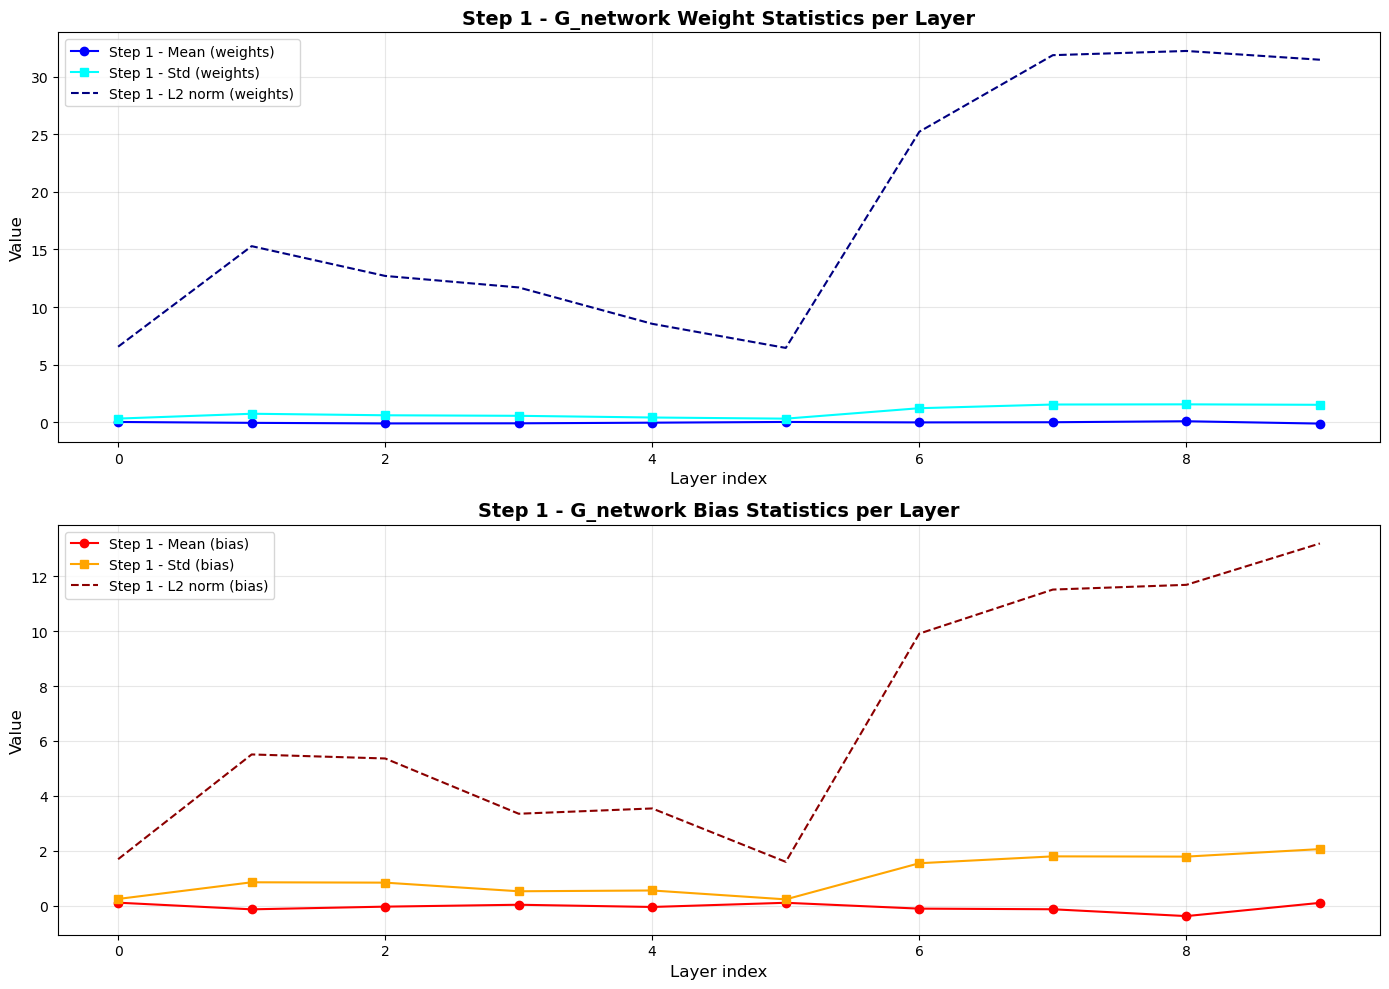

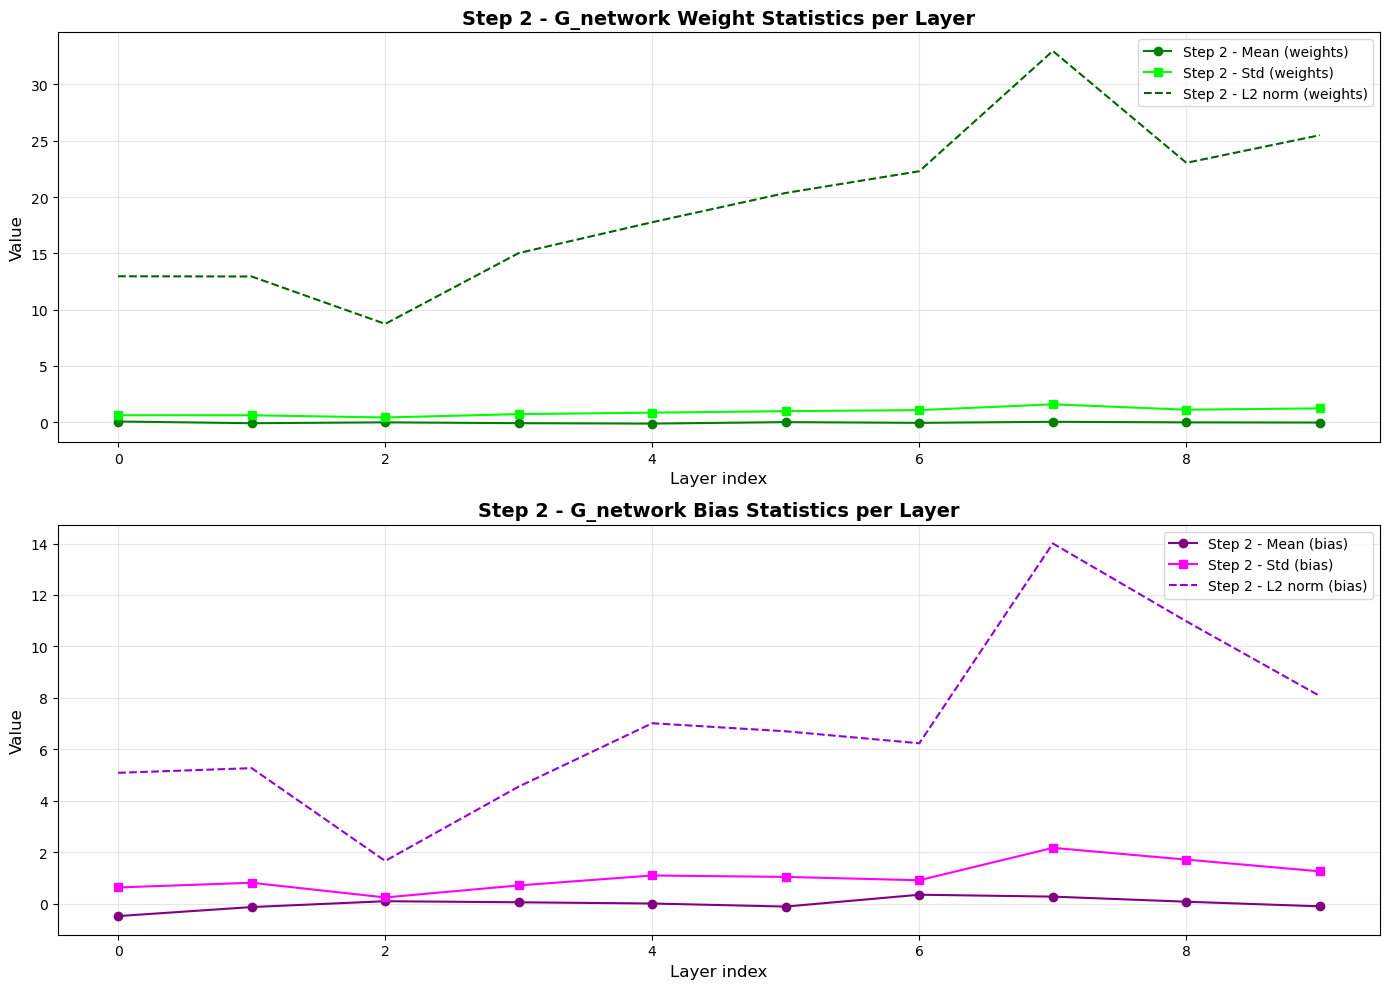

In [44]:
param_data = analyze_mapping_net(mapping_net, return_lists=True)


In [ ]:
    mapping_net_test = SimpleStackedHamiltonianNetwork(
        #Hpw many Step_1 + Step_2 layers to stack
        n_layers=1,
        # MLP Architecture parameters
        hidden_dims= [30, 60, 32],
        n_hidden_layers = None,   #Leave None if you provide list on hidden_dims
        
        # Activation parameters
        activation = 'gelu',
        activation_params = None,
        final_activation = None,   #Final layer activation function
        final_activation_only_on_final_layer = True,
        tanh_wrapper = False,
        
        # Initialization parameters
        weight_init = 'orthogonal',
        weight_init_params = {'gain': 1},
        bias_init = 'zeros',
        bias_init_value = 0.0,
        
        
        # Architectural choices
        use_bias = True,
        use_layer_norm = False,
        
        # Input/Output parameters
        input_dim = 2,  # x or u and t
        output_dim = 1,  # scalar G or F
        a_eps_min= 0.5,  # Minimum value for a
        a_eps_max= 2,  # Maximum value for a  
        a_k= 0.1,

        step_1_a_mean_innit= 1.0,
        step_2_a_mean_innit= 1.0,
        std_to_mean_ratio_a_mean_init= 0.3,

        step_1_gamma_mean_innit= 3.5,
        step_2_gamma_mean_innit= 2.5,
        std_to_mean_ratio_gamma_mean_init= 0.3,

        step_1_c1_mean_innit= 0.0,
        step_2_c1_mean_innit= 0.0,
        std_to_mean_ratio_c1_mean_init= 0.0,

        step_1_c2_mean_innit= 0.0,
        step_2_c2_mean_innit= 0.0,
        std_to_mean_ratio_c2_mean_init= 0.0,

        bound_innit=0.0,
    )
    

In [102]:
count_parameters(mapping_net_test)

8256

In [67]:
count_parameters(mapping_net_test)

15260